<font size="5"> <div class="alert alert-block alert-info"> Projeto aplicado em Ciência de Dados I </div> </font>
    
  <font size="5"> Licenciatura em Ciência de Dados </font>

  
<font size="4"> **Gonçalo Mealha 123391**</font><br>
<font size="4"> **Jingyu Huang 123432**</font><br>
<font size="4"> **João Jin 123388**</font><br>
<font size="4"> **José Valério 112255**</font><br>
<font size="4"> **Tiago Fernandes 123400**</font><br>
<font size="4"> **Salvador Ferreira 123465**</font><br>

  

    
  <font size="3"> Docente: Sérgio Moro </font>
  
  
  

    

  
  <font size="5"> <div class="alert alert-success" role="alert"> Previsão do n.º de sets para a conclusão de um jogo de ténis profissional (ranking ATP) - Estados Unidos </div></font>

In [ ]:
# Bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from collections import defaultdict
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2_contingency,pearsonr
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Análise Exploratória de Dados

In [ ]:
# Importar os dados
dados = pd.read_csv("atp1.final.csv", na_values="-")

In [ ]:
# Número de registos
len(dados)

79807

In [ ]:
# Visualização das 5 perimeiras linhas da base de dados
dados.head()

,_id,winner_id,winner_name,winner_height,winner_country,winner_forehand,winner_birth_date,loser_id,loser_name,loser_height,...,tournament_name,tournament_start_date,tournament_end_date,match_ground,tournament_prize,match_round,winner_rank,loser_rank,game_score,number_of_sets
0,67fa8472ef021112a2b43aed,a092,Andre Agassi,180,United States,Right-Handed,1970/04/29,p024,Mikael Pernfors,173,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Finals,18.0,39.0,64 64 75,3
1,67fa8472ef021112a2b43aee,a092,Andre Agassi,180,United States,Right-Handed,1970/04/29,p012,David Pate,183,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Quarter-Finals,18.0,20.0,64 62,2
2,67fa8472ef021112a2b43aef,c057,Kevin Curren,185,United States,Right-Handed,1958/03/02,g023,Andres Gomez,193,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Quarter-Finals,38.0,9.0,63 36 46,3
3,67fa8472ef021112a2b43af0,p024,Mikael Pernfors,173,Sweden,Right-Handed,1963/07/16,g039,Jim Grabb,193,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Quarter-Finals,39.0,62.0,36 16,2
4,67fa8472ef021112a2b43af1,s034,Robert Seguso,191,United States,Right-Handed,1963/05/01,m012,Amos Mansdorf,175,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Quarter-Finals,150.0,26.0,67 67,2


In [ ]:
# Mostar colunas da base de dados
dados.columns

Index(['_id', 'winner_id', 'winner_name', 'winner_height', 'winner_country',
       'winner_forehand', 'winner_birth_date', 'loser_id', 'loser_name',
       'loser_height', 'loser_country', 'loser_forehand', 'loser_birth_date',
       'match_id', 'tournament_name', 'tournament_start_date',
       'tournament_end_date', 'match_ground', 'tournament_prize',
       'match_round', 'winner_rank', 'loser_rank', 'game_score',
       'number_of_sets'],
      dtype='object')

In [ ]:
# Remove a primeira coluna "_id"
dados = dados.iloc[:, 1:]

In [ ]:
# Visualização das 5 perimeiras linhas da base de dados
dados.head()

,winner_id,winner_name,winner_height,winner_country,winner_forehand,winner_birth_date,loser_id,loser_name,loser_height,loser_country,...,tournament_name,tournament_start_date,tournament_end_date,match_ground,tournament_prize,match_round,winner_rank,loser_rank,game_score,number_of_sets
0,a092,Andre Agassi,180,United States,Right-Handed,1970/04/29,p024,Mikael Pernfors,173,Sweden,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Finals,18.0,39.0,64 64 75,3
1,a092,Andre Agassi,180,United States,Right-Handed,1970/04/29,p012,David Pate,183,United States,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Quarter-Finals,18.0,20.0,64 62,2
2,c057,Kevin Curren,185,United States,Right-Handed,1958/03/02,g023,Andres Gomez,193,Ecuador,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Quarter-Finals,38.0,9.0,63 36 46,3
3,p024,Mikael Pernfors,173,Sweden,Right-Handed,1963/07/16,g039,Jim Grabb,193,United States,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Quarter-Finals,39.0,62.0,36 16,2
4,s034,Robert Seguso,191,United States,Right-Handed,1963/05/01,m012,Amos Mansdorf,175,Israel,...,Memphis,15/2/1988,21/2/1988,Hard,"$297,500",Quarter-Finals,150.0,26.0,67 67,2


## Dados omissos

In [ ]:
# Número de valores omissos em cada variável
dados_na = dados.isna().sum()

# Selecionar apenas as colunas com valores nulos
colna_dados = dados_na.loc[dados_na > 0]
# Exibir as colunas com valores nulos
print(colna_dados)

loser_forehand         1
tournament_prize     343
winner_rank         2073
loser_rank          6056
game_score             7
dtype: int64


<ipython-input-198-653dfbfca28f>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-198-653dfbfca28f>:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



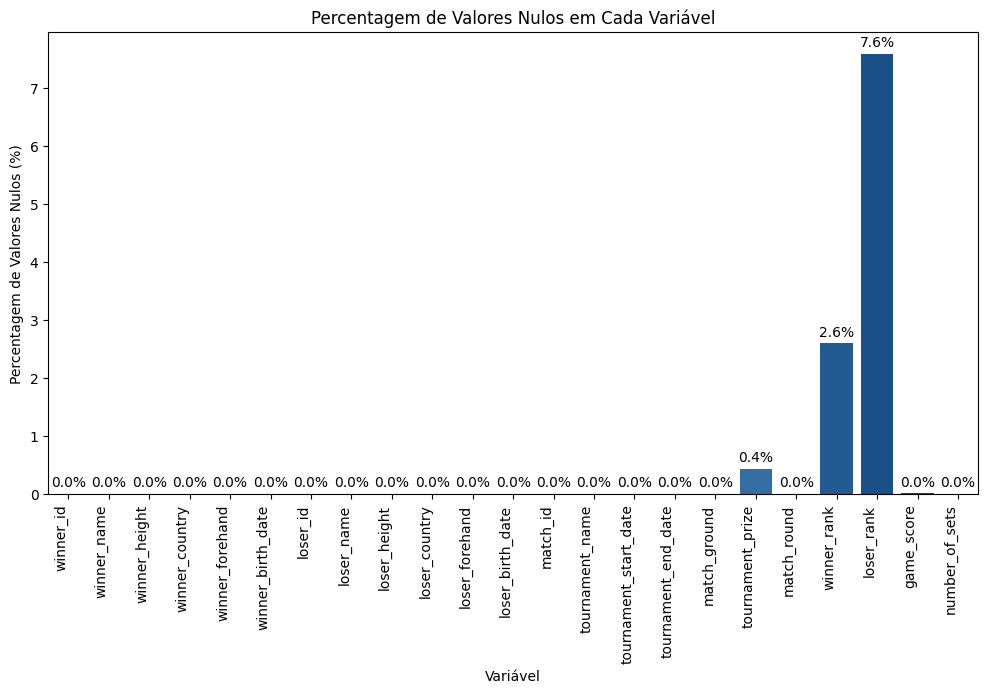

In [ ]:
# Calcular a percentagem dos valores omissos
percent_na_dados = (dados_na / len(dados)) * 100

# Gráficos da frequência relativa com os valores omissos de cada dataframe
# Converter os dados em formato de tabela
df_percent_na_dados = percent_na_dados.reset_index()
df_percent_na_dados.columns = ['Variável', 'Percentagem de Nulos']

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Variável', y='Percentagem de Nulos', data=df_percent_na_dados, palette='Blues')

# Adicionar rótulos e título
plt.xlabel('Variável')
plt.ylabel('Percentagem de Valores Nulos (%)')
plt.title('Percentagem de Valores Nulos em Cada Variável')

# Colocar rótulos do eixo x para melhorar a legibilidade
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Adicionar a percentagem diretamente nas barras
for p in ax.patches:
    width = p.get_width()       # Largura da barra
    height = p.get_height()     # Altura da barra (valor da percentagem)
    x, y = p.get_xy()           # Posição da barra
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height + 0.2), ha='center', va='center')   # Texto centralizado por cima da barra


plt.show()

In [ ]:
# Número de linhas com pelo menos um valor omisso
dados.isnull().any(axis=1).sum()
dados[dados.isnull().any(axis=1)]

,winner_id,winner_name,winner_height,winner_country,winner_forehand,winner_birth_date,loser_id,loser_name,loser_height,loser_country,...,tournament_name,tournament_start_date,tournament_end_date,match_ground,tournament_prize,match_round,winner_rank,loser_rank,game_score,number_of_sets
44,m047,John McEnroe,180,United States,Left-Handed,1959/02/16,l036,John Lloyd,178,United Kingdom,...,South Orange,30/7/1979,5/8/1979,Clay,"$75,000",Finals,3.0,NaN,67 64 60,3
45,m047,John McEnroe,180,United States,Left-Handed,1959/02/16,k044,Chris Kachel,0,Australia,...,South Orange,30/7/1979,5/8/1979,Clay,"$75,000",Quarter-Finals,3.0,NaN,61 63,2
47,m047,John McEnroe,180,United States,Left-Handed,1959/02/16,c072,David Carter,183,Australia,...,South Orange,30/7/1979,5/8/1979,Clay,"$75,000",Round of 32,3.0,NaN,63 61,2
48,j029,John James,183,Australia,Right-Handed,1951/03/07,gd13,Michael Grant,183,United States,...,South Orange,30/7/1979,5/8/1979,Clay,"$75,000",Round of 32,86.0,NaN,76 63,2
49,m047,John McEnroe,180,United States,Left-Handed,1959/02/16,l005,Jay Lapidus,188,United States,...,South Orange,30/7/1979,5/8/1979,Clay,"$75,000",Semi-Finals,3.0,NaN,61 62,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79785,n707,Naoki Nakagawa,180,Japan,Right-Handed,1996/11/19,h09d,Shawn H. Hadavi,0,United States,...,U.S.A. F18,12/6/2017,18/6/2017,Clay,"$15,000",Round of 16,611.0,NaN,63 76,2
79794,gc96,Farris Fathi Gosea,0,United Kingdom,Unknown,1994/03/03,sy12,Myles Schalet,0,United States,...,U.S.A. F18,12/6/2017,18/6/2017,Clay,"$15,000",Round of 32,960.0,NaN,63 61,2
79795,h09d,Shawn H. Hadavi,0,United States,Unknown,1995/10/24,j614,Collin Johns,180,United States,...,U.S.A. F18,12/6/2017,18/6/2017,Clay,"$15,000",Round of 32,NaN,1028.0,62 36 36,3
79797,lb07,Gonzalo Lama,180,Chile,Right-Handed,1993/04/27,s0c6,Josh Silverstein,0,United States,...,U.S.A. F18,12/6/2017,18/6/2017,Clay,"$15,000",Round of 32,675.0,NaN,62 75,2


## Torneios

In [ ]:
# Número de torneios diferentes da base de dados
dados["tournament_name"].nunique()

415

In [ ]:
# Nomes distintos de torneios
dados["tournament_name"].unique()

array(['Memphis', 'South Orange', 'U.S.A. F26', 'Tampa', 'US Open',
       'U.S.A. F10', 'Sarasota', 'U.S.A. F1', 'IND v USA WGPO',
       'M25 Tulsa', 'U.S.A. F32', 'Pepsi Grand Slam', 'U.S.A. F3',
       'Las Vegas', 'U.S.A. F29', 'Washington', 'Lexington', 'Sacramento',
       'Binghamton', 'San Jose', 'M25 Calabasas', 'Masters',
       'USA V CZE QF', 'Joplin', 'Dallas', 'U.S.A. F8', 'Atlanta WCT',
       'Cleveland', 'U.S.A. F20', 'Houston WCT', 'Tallahassee',
       'Forest Hills', 'Winnetka', 'U.S.A. F23', 'U.S.A. F12',
       'Knoxville', 'USA vs. VEN - AMERICAS PRELIMINARY QF', 'U.S.A. F11',
       'Philadelphia WCT', 'U.S.A. F22', 'Birmingham', 'Bronx',
       'U.S.A. F5', 'St. Petersburg', 'FRA V USA QF', 'U.S.A. F19',
       'Richmond WCT', 'Cary', 'U.S.A. F25', 'Houston', 'U.S.A. F4',
       'San Francisco', 'Winston-Salem', 'U.S.A. F13', 'Washington-1',
       'ATP Masters 1000 Cincinnati', 'U.S.A. F7', 'Lubbock',
       'U.S.A. F15', 'U.S.A. F30', 'Charlottesville', 'M15

### Incluir apenas os torneios da ATP Tour, ATP Challenger e ITF

In [ ]:
# Torneios que fazem parte da ATP (retirar jogos de seleções)
torneios_atp = [
    'Memphis', 'South Orange', 'U.S.A. F26', 'Tampa', 'US Open','U.S.A. F10', 'Sarasota', 'U.S.A. F1', 'M25 Tulsa', 'U.S.A. F32','Pepsi Grand Slam', 'U.S.A. F3', 'Las Vegas', 'U.S.A. F29',
    'Washington', 'Lexington', 'Sacramento', 'Binghamton', 'San Jose','M25 Calabasas', 'Masters', 'Joplin', 'Dallas', 'U.S.A. F8','Atlanta WCT', 'Cleveland', 'U.S.A. F20', 'Houston WCT',
    'Tallahassee', 'Forest Hills', 'Winnetka', 'U.S.A. F23','U.S.A. F12', 'Knoxville', 'Philadelphia WCT', 'U.S.A. F22','Birmingham', 'Bronx', 'U.S.A. F5', 'St. Petersburg', 'Cary',
    'U.S.A. F25', 'Houston', 'U.S.A. F4', 'San Francisco','Winston-Salem', 'U.S.A. F13', 'Washington-1','ATP Masters 1000 Cincinnati', 'U.S.A. F7', 'Lubbock',
    'U.S.A. F15', 'U.S.A. F30', 'Charlottesville', 'M15 Champaign','U.S.A. F31', 'Chicago WCT', 'Louisville', 'Columbus-2','Schenectady', 'Tucson', 'New Orleans', 'Newport', 'Spring',
    'U.S.A. F24', 'Columbus', 'Los Angeles', 'U.S.A. F21', 'Fairfield','Champaign', 'Salisbury', 'U.S.A. F6', 'North Conway','U.S.A. F28', 'U.S.A. F9', 'Washington WCT', 'Maui',
    'Charlotte WCT', 'Coral Springs', 'Delray Beach', 'U.S.A. F36','M15 Ithaca', 'Philadelphia', 'U.S.A. F18', 'Washington-3', 'Dayton','U.S.A. F14', 'Macon', 'M25 Memphis', 'Yuba City',
    'ATP Masters 1000 Miami', 'Des Moines', 'Orlando','Atlantic City', 'Boca Raton', 'Boston', 'Scottsdale', 'Baltimore','Cincinnati', 'M25 Naples', 'Napa', 'U.S.A. F17', 'Fort Worth',
    'U.S.A. F2', 'Fresno', 'M25 Calabasas, CA', 'Forest Hills WCT','West Palm', 'Denver', 'WCT Finals', 'Austin', 'Savannah','Nashville', 'New Haven', 'Rocky Mount', 'Stockton', 'Tulsa',
    'Rye Brook', 'Salisbury WCT', 'U.S.A. F33', 'Aptos', 'Berkeley','Laguna Niguel', 'Key Biscayne', 'Honolulu', 'Amarillo', 'Charlotte','U.S.A. F27', 'Berkeley WCT', 'Baton Rouge', 'M25 Orlando',
    'Long Island', 'Newport Beach', 'M25 Harlingen', 'New York','M15 Edwardsville', 'Haverford', 'St. Petersburg WCT','Washington-2', 'Pinehurst', 'Stratton Mountain', 'Carlsbad WCT',
    'Hampton', 'Paramus', 'Atlanta', 'Jackson WCT','World Invitational Tennis Classic', 'Waikoloa', 'M15 East Lansing','M25 Harlingen, TX', 'Valencia', 'Cary II', 'Omaha', 'Urbana',
    'Tunica Resorts', 'U.S.A. F17-A', 'Pittsburgh', 'Tiburon','Birmingham WCT', 'Glendale', 'Carson', 'U.S.A. F17-B','Livingston', 'Tarzana', 'U.S.A. F16', 'Detroit', 'Pasadena',
    'U.S.A. F35', 'Miami', 'Jackson', 'Fort Myers', 'Ann Arbor','U.S.A. F24A', 'Roanoke', 'Jacksonville', 'Burbank','WCT Tournament of Champions', 'Los Angeles-2', 'M15 Norman',
    'Seattle', 'M25 Decatur', 'Pembroke Pines', 'Tennis Masters Cup','Raleigh', 'M15 Fayetteville, AR', 'U.S.A. F16B', 'Dallas 2','Charleston', 'Salt Lake City', 'Hartford WCT', 'M25  Austin',
    'New York-2', 'Delray Beach WCT', 'U.S.A. F22B', 'Alamo','Little Rock', 'Los Angeles-1', 'Chicago', 'Torrance','Shreveport', 'Carlsbad', 'M15 Sunrise', 'M15 Naples', 'Indian Wells',
    'Baltimore WCT', 'Rancho Mirage', 'San Antonio', 'Orlando 2','Kerrville', 'U.S.A. F37', 'Ponte Vedra', 'Sunrise', 'Calabasas','Palm Springs', 'Flushing Meadow', 'San Jose-2', 'Carson-2',
    'M15 Fayetteville', 'Mandeville', 'M25 Pensacola','M25 Fort Worth', 'Laver Cup', 'Phoenix', 'M15 Tallahassee', 'Napoli','Fort Worth WCT', 'Stowe', 'M25 Norman', 'Lancaster', 'M15 Weston',
    'St Petersburg', 'M25 Fayetteville', 'Irving', 'M15 Arcadia','Cape Cod', 'U.S.A. F27A', 'Montgomery', 'U.S.A. F24B','Kansas City', 'U.S.A. F17-C', 'Asheville', 'M15 Naples, FL',
    'U.S.A. F22-A', 'M25 Wichita', 'M25 Champaign', 'St. Louis WCT','M15 Champaign, IL', 'Clemmons', 'Naples', 'Cleveland WCT','M25 Weston', 'Bretton Woods', 'Springfield', 'U.S.A. F34',
    'San Diego', 'M15 Vero Beach', 'M25 Las Vegas','M25 Rancho Santa Fe', 'U.S.A  F12', 'Oahu', 'Covington','La Quinta', 'U.S.A. F24C', 'Detroit WCT', 'Atlanta Olympics',
    'Ocean City', 'Waco', 'Columbus 3', 'M15 Tucson', 'U.S.A. F39','Tyler', 'M25 Iowa City', 'College Station','US Open Preliminary Round', 'M15 Austin', 'WCT Challenge Cup',
    'New York-1', 'M25 Vero Beach', 'Huntington Beach', 'Albany','Columbia', 'M15 Lubbock', 'Chicago-2', 'M15 Orange Park','San Antonio WCT', 'Lafayette', 'M15 Rochester', 'Bloomfield',
    'M25 Claremont', 'Virginia Beach', 'M25 Tucson', 'Hilton Head WCT','Bradenton', 'Cedar Grove', 'Kiawah Island', 'West Bloomfield','Denver WCT', 'Hilton Head', 'Palm Desert WCT', 'M25 Waco',
    'U.S.A  F16A', 'M25 Palm Coast', 'U.S.A. F38', 'New Orleans WCT','San Ramon', 'U.S.A. F28B', 'U.S.A  F18', 'Hartford','North Miami Beach', 'M25 Columbus', 'Miami WCT', 'Ojai',
    'M25 Los Angeles', 'WCT Aetna World Cup', 'Memphis WCT','M25 Houston', 'U.S.A. F40', 'Tempe', 'M15 Pittsburgh','Lakeway WCT', 'M25 Wichita, KS', 'Armonk', 'Columbus 2',
    'M25 Weston, FL', 'M25 Edwardsville', 'Las Vegas-2', 'Richmond','Las Vegas WCT', 'Homestead', 'M25 Bakersfield', 'Sedona','Los Angeles WCT', 'Green Bay', 'M25 Bakersfield, CA', 'Houston -1',
    'M15 Claremont', 'Boston-2', 'M15 Orlando', 'Concord','Columbus WCT', 'Laguna Hills', 'Wall', 'U.S.A. F19B', 'Lincoln'
]



# Incluir apenas torneios ATP
dados = dados[dados["tournament_name"].isin(torneios_atp)]


In [ ]:
len(torneios_atp)

344

### Número de jogos por torneio

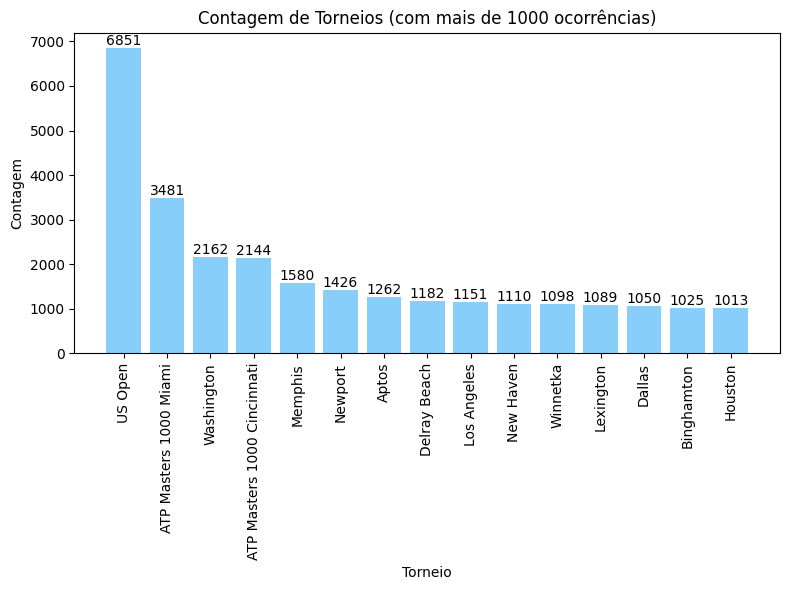

In [ ]:
# Calcular a contagem de valores por categoria
contagem = dados["tournament_name"].value_counts().sort_values(ascending=False)

# Filtrar apenas as categorias com contagem maior do que 1000
contagem_filtrada = contagem[contagem > 1000]

# Converter os índices para posições numéricas
x_pos = np.arange(len(contagem_filtrada))

# Criar o gráfico de barras com espaço entre elas (reduzindo o width)
plt.figure(figsize=(8, 6))
plt.bar(x_pos, contagem_filtrada.values, color='#87CEFA', width=0.8)  # width < 1 cria espaço

# Ajustar os rótulos no eixo X
plt.xticks(ticks=x_pos, labels=contagem_filtrada.index, rotation=90)

# Adicionar rótulos e título
plt.xlabel('Torneio')
plt.ylabel('Contagem')
plt.title('Contagem de Torneios (com mais de 1000 ocorrências)')

# Adicionar valores acima das barras
for index, value in enumerate(contagem_filtrada.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()



## Distribuição do número de sets

In [ ]:
# Contagem de cada valor único
print(dados['number_of_sets'].value_counts())

number_of_sets
2    47854
3    26189
4     1842
5     1095
1      616
0      354
Name: count, dtype: int64


### Eliminar jogos com casos atípicos

In [ ]:
# Eliminar os jogos com 0 sets (354) e 1 set (616)
dados = dados[(dados['number_of_sets'] != 0) & (dados['number_of_sets'] != 1)]

# Eliminar jogos com casos atípicos (desistência, lesão ou castigo)
dados = dados[~dados['game_score'].str.contains(r'\(RET\)|\(W/O\)|\(DEF\)', na=False)]

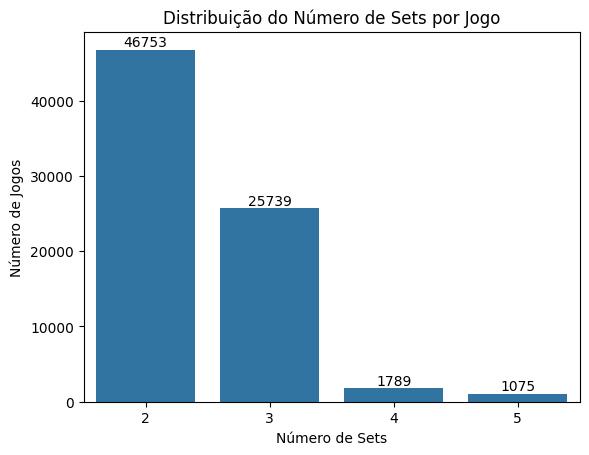

In [ ]:
# Criar um gráfico para a variável 'number_of_sets', eixo x com ordem decrescente
ax = sns.countplot(data=dados, x='number_of_sets', order=sorted(dados['number_of_sets'].unique()))

# Adicionar números em cima das barras
ax.bar_label(ax.containers[0], fontsize=10, color='black')

# Adicionar título ao gráfico
plt.title('Distribuição do Número de Sets por Jogo')

# Nomear eixos X e Y
plt.xlabel('Número de Sets')
plt.ylabel('Número de Jogos')

# Mostrar o gráfico
plt.show()

### Jogos à melhor de 3 sets e jogos à melhor de 5 sets

In [ ]:
def classificar_formato_jogo(score):
    if pd.isna(score):  # Verificar se o score é NA
        return None

    sets = score.replace(',', ' ').split()  # Substituir víirgula por espaço e divide score numa lista
    n_sets = len(sets)  # Contagem do número de sets

    # Regras diretas
    if n_sets == 2:
        return "Melhor de 3"
    if n_sets >= 4:
        return "Melhor de 5"

    # Contadores para os sets ganhos de cada um dos jogadores
    sets_jogador1 = 0
    sets_jogador2 = 0

    # Analisar os sets individualmente, casos sem hífen e com hífen
    for s in sets:
        try: # Faz a separação dos sets
            if "-" not in s and len(s) == 2: # se o set for, por exemplo, 64 -> a=6, b=4
                a, b = int(s[0]), int(s[1])
            elif "-" in s:
                a, b = map(int, s.split('-')) # se o set for, por exemplo, 10-8 -> a=10, b=8
            else:
                continue

            # Contar o número de sets ganhos pelos jogadores
            if a > b:
                sets_jogador1 += 1
            elif b > a:
                sets_jogador2 += 1
        except:
            continue

    # Determinar o vencedor do jogo, aquele que ganhou mais sets
    sets_vencedor = max(sets_jogador1, sets_jogador2)

    # Classificar o formato do jogo com base no número de sets ganhos
    if sets_vencedor == 3:
        return "Melhor de 5"  # Se o vencedor ganhou 3 sets, o formato é "Melhor de 5"
    elif sets_vencedor == 2:
        return "Melhor de 3"  # Se o vencedor ganhou 2 sets, o formato é "Melhor de 3"

    return None


# Aplicar esta função à coluna "game_score" e calcula a frequência de cada um dos formatos de jogo
distribuicao = dados['game_score'].apply(classificar_formato_jogo).value_counts()
print(distribuicao)

# Filtrar os jogos "Melhor de 5"
jogos_melhor_de_5 = dados[dados['game_score'].apply(classificar_formato_jogo) == 'Melhor de 5']

# Exibir os scores dos jogos "Melhor de 5"
print(jogos_melhor_de_5['game_score'])

game_score
Melhor de 3    69738
Melhor de 5     5615
Name: count, dtype: int64
0              64 64 75
143         62 46 75 61
144         76 60 67 64
145      46 67 63 64 64
146            36 57 46
              ...      
76425       75 26 61 64
76426       64 46 75 76
76427       75 63 67 61
76428    75 67 16 61 75
76766       63 16 36 16
Name: game_score, Length: 5615, dtype: object


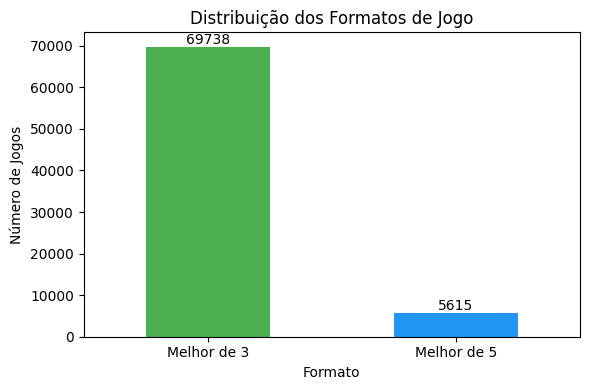

In [ ]:
# Criar o gráfico
plt.figure(figsize=(6, 4))
ax = distribuicao.plot(kind='bar', color=['#4CAF50', '#2196F3'])
# Adicionar números em cima das barras
ax.bar_label(ax.containers[0], fontsize=10, color='black')

# Adicionar o título ao gráfico
plt.title('Distribuição dos Formatos de Jogo')

# Nomear eixos  X e Y
plt.ylabel('Número de Jogos')
plt.xlabel('Formato')

# Deixar os rótulos do eixo X em horizontal
plt.xticks(rotation=0)

# Mostrar o gráfico
plt.tight_layout()
plt.show()



#### Eliminar jogos à melhor de 5

In [ ]:
# Filtrar os dados para manter apenas os jogos à melhor de 3 sets
dados = dados[dados['game_score'].apply(classificar_formato_jogo) == "Melhor de 3"]


In [ ]:
# Contagem de cada valor único
print(dados['number_of_sets'].value_counts())

number_of_sets
2    46753
3    22985
Name: count, dtype: int64


In [ ]:
# Contagens absolutas
contagens = dados['number_of_sets'].value_counts()

# Percentagens relativas
percentagens = dados['number_of_sets'].value_counts(normalize=True) * 100

# Juntar numa tabela
tabela_frequencias = pd.DataFrame({
    'Frequência Absoluta': contagens,
    'Percentagem (%)': percentagens.round(2)
})

print(tabela_frequencias)

                Frequência Absoluta  Percentagem (%)
number_of_sets                                      
2                             46753            67.04
3                             22985            32.96


### Número de jogos por ronda

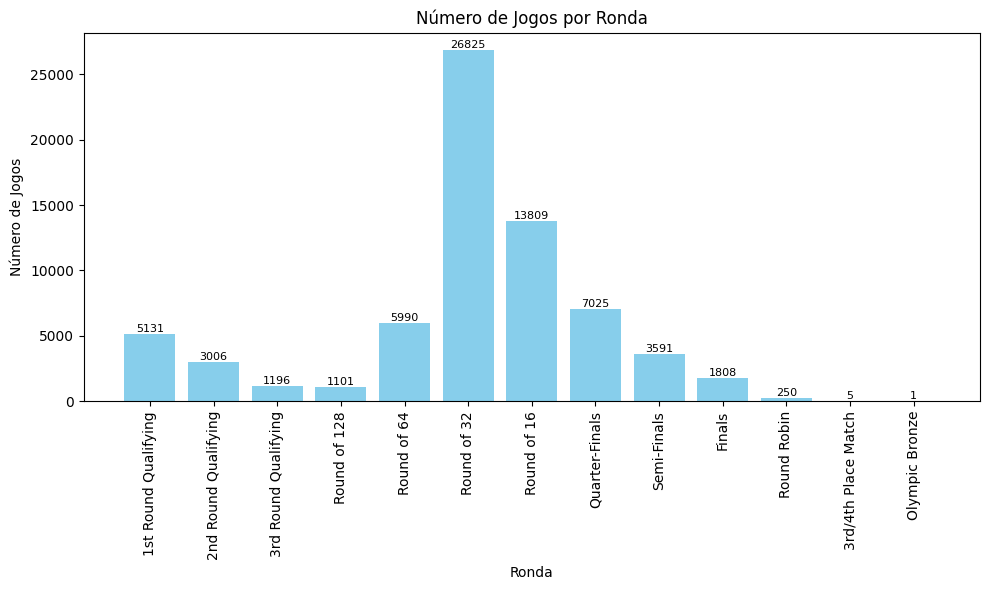

In [ ]:
# Definir a ordem das rondas, da mais preliminar até a final
ordem_rondas = [
    "1st Round Qualifying",
    "2nd Round Qualifying",
    "3rd Round Qualifying",
    "Round of 128",
    "Round of 64",
    "Round of 32",
    "Round of 16",
    "Quarter-Finals",
    "Semi-Finals",
    "Finals",
    "Round Robin",
    "3rd/4th Place Match",
    "Olympic Bronze"
]

# Calcular o número de jogos por ronda
jogos_por_ronda = dados['match_round'].value_counts().reset_index()
jogos_por_ronda.columns = ['match_round', 'numero_de_jogos']

# Filtrar para manter apenas rondas presentes na ordem definida e remover NaNs
jogos_por_ronda = jogos_por_ronda[jogos_por_ronda['match_round'].isin(ordem_rondas)].dropna()

# Garantir que todos os valores são strings
jogos_por_ronda['match_round'] = jogos_por_ronda['match_round'].astype(str)

# Aplicar a ordem desejada
jogos_por_ronda['match_round'] = pd.Categorical(jogos_por_ronda['match_round'], categories=ordem_rondas, ordered=True)
jogos_por_ronda = jogos_por_ronda.sort_values('match_round')

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(jogos_por_ronda['match_round'], jogos_por_ronda['numero_de_jogos'], color='skyblue')

# Adicionar valores acima das barras
for index, value in enumerate(jogos_por_ronda['numero_de_jogos']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

# Adicionar título ao gráfico
plt.title('Número de Jogos por Ronda')

# Nomear eixos X e Y
plt.xlabel('Ronda')
plt.ylabel('Número de Jogos')

# Deixar os rótulos do eixo X em vertical para melhor vizualização
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar o gráfico
plt.show()



### Uniformizar os jogos de classificação em apenas uma categoria nova "Qualifiers"

In [ ]:
# Uniformizar os jogos de qualificação numa categoria
dados["match_round"] = dados["match_round"].replace(
    ["1st Round Qualifying", "2nd Round Qualifying", "3rd Round Qualifying", "Round Robin"],
    "Qualifiers"
)

# Eliminar as rondas com poucos jogos
dados = dados[~dados["match_round"].isin(["3rd/4th Place Match", "Olympic Bronze"])]

### Número de jogos por tipo de piso

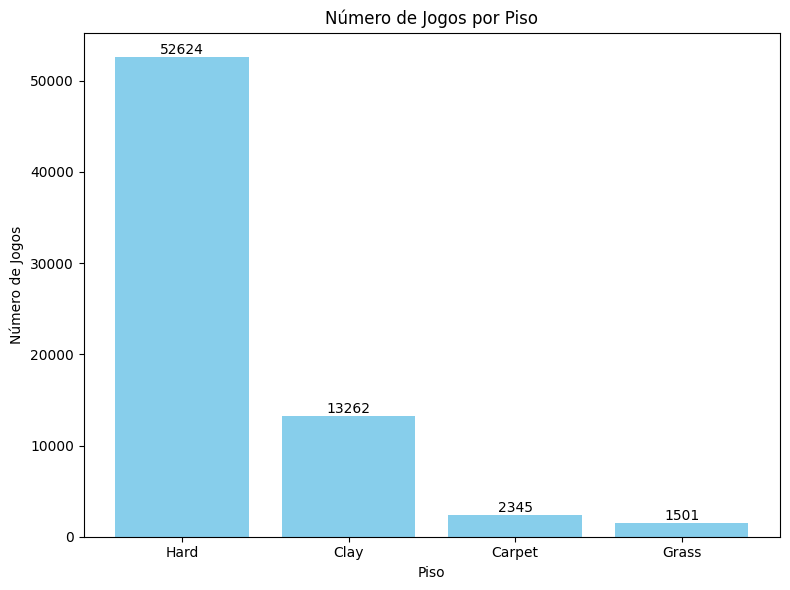

In [ ]:
# Calcular o número de jogos por piso
jogos_por_piso = dados['match_ground'].value_counts().reset_index()
jogos_por_piso.columns = ['match_ground', 'numero_de_jogos']

# Ordenar por número de jogos
jogos_por_piso = jogos_por_piso.sort_values('numero_de_jogos', ascending=False)

# Criar o gráfico
plt.figure(figsize=(8, 6))
plt.bar(jogos_por_piso['match_ground'], jogos_por_piso['numero_de_jogos'], color='skyblue')

# Adicionar valores acima das barras
for index, value in enumerate(jogos_por_piso['numero_de_jogos']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Adicionar título ao gráfico
plt.title('Número de Jogos por Piso')

# Nomear eixos X e Y
plt.xlabel('Piso')
plt.ylabel('Número de Jogos')

# Deixar os rótulos do eixo X em horizontal
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


### Sets obtidos por cada tipo de piso

In [ ]:
# Filtrar colunas necessárias e agrupar os dados
fluxos = dados[['match_ground', 'number_of_sets']].groupby(['match_ground', 'number_of_sets']).size().reset_index(name='count')

# Criar labels únicas
labels_ground = fluxos['match_ground'].unique().tolist()
labels_sets = fluxos['number_of_sets'].astype(str).unique().tolist()
labels = labels_ground + labels_sets

# Mapear labels para índices
label_map = {label: i for i, label in enumerate(labels)}

# Preparar source, target e valores
sources = fluxos['match_ground'].map(label_map)
targets = fluxos['number_of_sets'].astype(str).map(label_map)
values = fluxos['count']

# Criar Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Transição: Tipo de Piso --> Nº de Sets", font_size=12)
fig.show()

### Distribuição dos golpes mais usados pelos jogadores

<ipython-input-217-a13c8b497a02>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



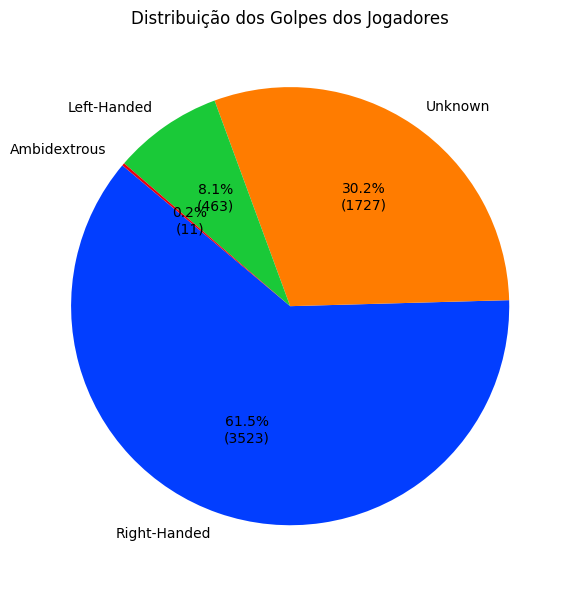

In [ ]:
# Dados de vencedores e perdedores com sua mão preferida
vencedores = dados[['winner_id', 'winner_forehand']].rename(columns={'winner_id': 'player_id', 'winner_forehand': 'forehand'})
perdedores = dados[['loser_id', 'loser_forehand']].rename(columns={'loser_id': 'player_id', 'loser_forehand': 'forehand'})

# Concatenar os dados de vencedores e perdedores
jogadores = pd.concat([vencedores, perdedores])

# Remover duplicados de jogador - garante que cada jogador seja contado apenas uma vez
# Para isso, tomamos a primeira ocorrência (poderíamos escolher a última ou uma lógica diferente)
jogadores_unicos = jogadores.drop_duplicates(subset='player_id', keep='first')

# Tratamento de valores omissos ou desconhecidos
# Se houver NaN, substituiremos por 'Unknown'
jogadores_unicos['forehand'] = jogadores_unicos['forehand'].fillna('Unknown')

# Contagem de forehand
distribuicao_mao = jogadores_unicos['forehand'].value_counts()

# Função para mostrar % e valor absoluto
def formato_autopct(pct, valores):
    total = sum(valores)
    valor_absoluto = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({valor_absoluto})'

# Gráfico de pizza com % e valor absoluto
plt.figure(figsize=(6, 6))
plt.pie(distribuicao_mao.values,
        labels=distribuicao_mao.index,
        autopct=lambda pct: formato_autopct(pct, distribuicao_mao.values),
        startangle=140,
        colors=sns.color_palette('bright'))

plt.title('Distribuição dos Golpes dos Jogadores')
plt.tight_layout()
plt.show()



### Eliminar jogadores ambidestros

In [ ]:
dados = dados[(dados['winner_forehand'] != 'Ambidextrous') & (dados['loser_forehand'] != 'Ambidextrous')]

## Prémios dos torneios

### Criar variável do ano do torneio

In [ ]:
# Certificar que a coluna 'tournament_start_date' está no formato datetime,
# ignorando qualquer erro ao converter valores inválidos para NaT
dados['tournament_start_date'] = pd.to_datetime(dados['tournament_start_date'], errors='coerce')

# Eliminar linhas onde 'tournament_start_date' seja NaT (valores ausentes)
dados = dados.dropna(subset=['tournament_start_date'])

# Criar a nova variável 'tournament_year'
dados['tournament_year'] = dados['tournament_start_date'].dt.year

# Verificar o resultado
print(dados[['tournament_start_date', 'tournament_year']].head())

# Eliminar os jogos com data de torneio igual ou inferior a 1937
dados = dados[dados['tournament_year'] > 1937]

# Supondo que os anos estejam em ordem crescente
anos_ordenados = sorted(dados['tournament_year'].unique())

# Converter para categoria ordinal
dados['tournament_year'] = pd.Categorical(dados['tournament_year'], categories=anos_ordenados, ordered=True)

# Contar o número de jogos por ano
#jogos_por_ano = dados['tournament_year'].value_counts().sort_index()

# Mostrar o resultado
#print(jogos_por_ano)




<ipython-input-219-adaff7984bd5>:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-219-adaff7984bd5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



  tournament_start_date  tournament_year
1            1988-02-15             1988
2            1988-02-15             1988
3            1988-02-15             1988
4            1988-02-15             1988
5            1988-02-15             1988


### Desinflacionar os prémios dos torneios usando o Consumer Price Index

In [ ]:
cpi_anos = {
    1964: 31.0,
    1965: 31.5,
    1966: 32.5,
    1967: 33.4,
    1968: 34.8,
    1969: 36.7,
    1970: 38.8,
    1971: 40.5,
    1972: 41.8,
    1973: 44.4,
    1974: 49.3,
    1975: 53.8,
    1976: 56.9,
    1977: 60.6,
    1978: 65.2,
    1979: 72.6,
    1980: 82.4,
    1981: 90.9,
    1982: 96.5,
    1983: 99.6,
    1984: 103.9,
    1985: 107.6,
    1986: 109.6,
    1987: 113.6,
    1988: 118.3,
    1989: 124.0,
    1990: 130.7,
    1991: 136.2,
    1992: 140.3,
    1993: 144.5,
    1994: 148.2,
    1995: 152.4,
    1996: 156.9,
    1997: 160.5,
    1998: 163.0,
    1999: 166.6,
    2000: 172.2,
    2001: 177.1,
    2002: 179.9,
    2003: 184.0,
    2004: 188.9,
    2005: 195.3,
    2006: 201.6,
    2007: 207.3,
    2008: 215.3,
    2009: 214.5,
    2010: 218.1,
    2011: 224.9,
    2012: 229.6,
    2013: 233.0,
    2014: 236.7,
    2015: 237.0,
    2016: 240.0,
    2017: 245.1,
    2018: 251.1,
    2019: 255.7,
    2020: 258.8,
    2021: 271.0,
    2022: 292.7
}

# Garantir que os prémios estão como valores numéricos
dados['tournament_prize'] = (
    dados['tournament_prize']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Remover $, vírgulas, etc
    .replace('', np.nan)                     # SubstituiR strings vazias por NaN
    .astype(float)                           # ConverteR para float
)

# Definir a referência para o valor ajustado (2019)
cpi_referencia = 255.7

# Ajustar os prémios pela inflação
dados['tournament_prize'] = dados.apply(
    lambda row: row['tournament_prize'] * (cpi_referencia / cpi_anos.get(row['tournament_year'], cpi_referencia)),
    axis=1
)

# Verificar os resultados ajustados
print(dados[['tournament_year', 'tournament_prize']])

      tournament_year  tournament_prize
1                1988     643032.544379
2                1988     643032.544379
3                1988     643032.544379
4                1988     643032.544379
5                1988     643032.544379
...               ...               ...
79802            2017      15648.714810
79803            2017      15648.714810
79804            2017      15648.714810
79805            2017      15648.714810
79806            2017      15648.714810

[69512 rows x 2 columns]


### Torneios com melhor remuneração

<ipython-input-221-beee94db65b9>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




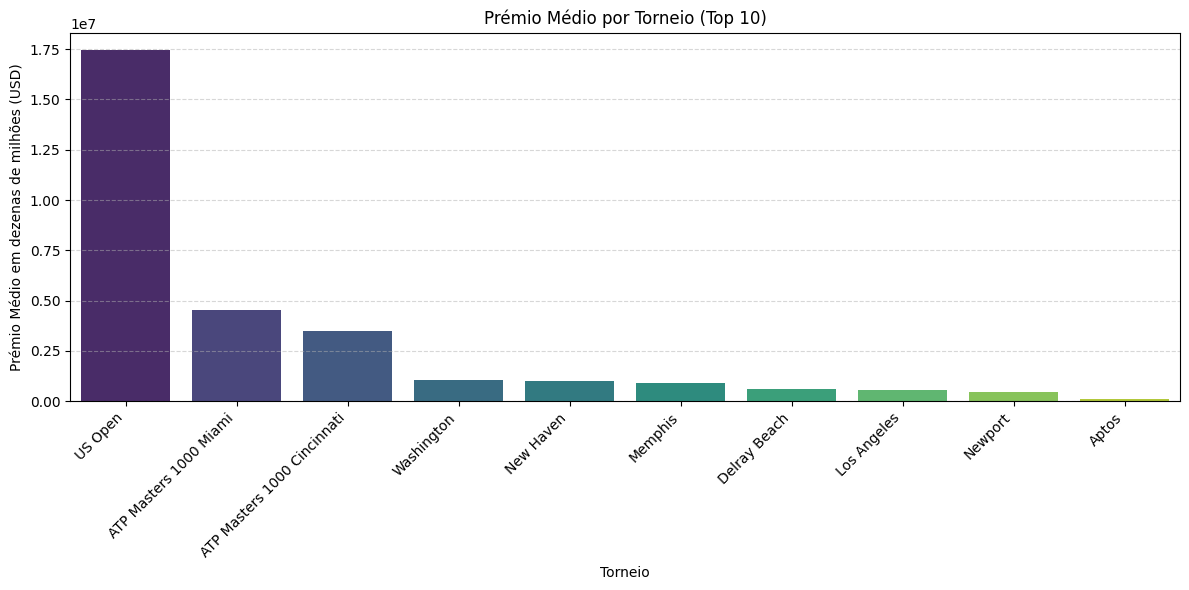

In [ ]:
# Garantir que os prémios estão como valores numéricos
dados['tournament_prize'] = (
    dados['tournament_prize']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # remove $, vírgulas, etc
    .replace('', np.nan)                    # substitui strings vazias por NaN
    .astype(float)                          # converte para float
)
# Filtrar os dados para os 10 torneios com mais jogos
torneios_top = dados['tournament_name'].value_counts().head(10).index
dados_top = dados[dados['tournament_name'].isin(torneios_top)]

# Calcular o valor médio do prémio por torneio
media_premios = (
    dados_top.groupby('tournament_name')['tournament_prize']
    .mean()
    .sort_values(ascending=False)
)

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=media_premios.index, y=media_premios.values, palette="viridis")

plt.xticks(rotation=45, ha='right')
plt.ylabel('Prémio Médio em dezenas de milhões (USD)')
plt.xlabel('Torneio')
plt.title('Prémio Médio por Torneio (Top 10)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Evolução dos prémios

<ipython-input-222-ac0c0bbe1820>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



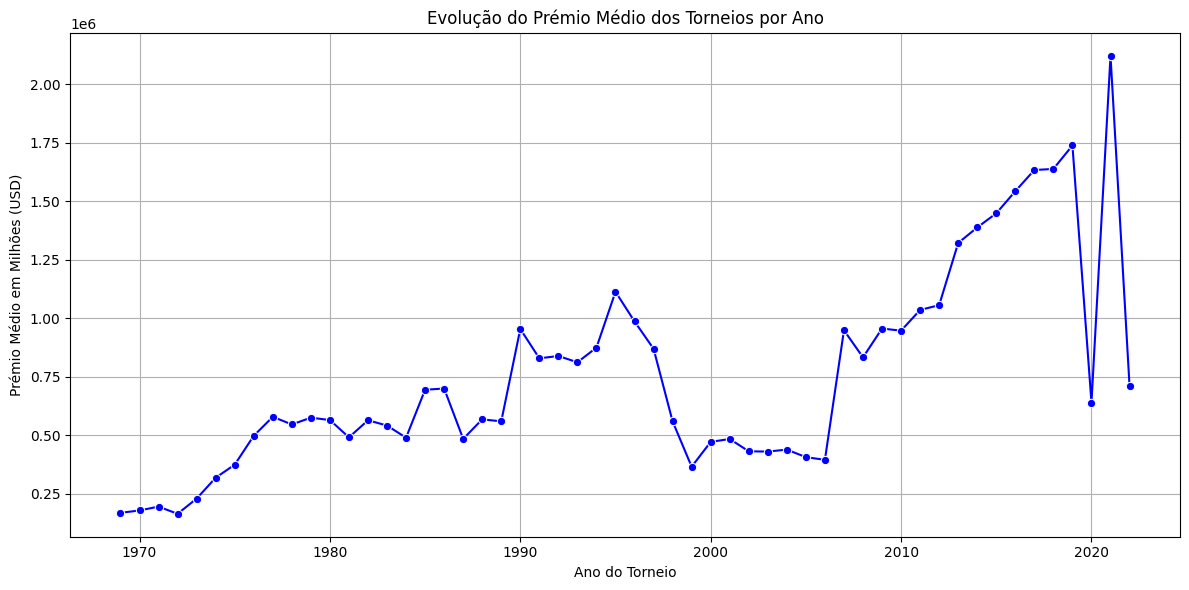

In [ ]:
# Agrupar por ano e calcular média do prémio
premios_por_ano = dados.groupby('tournament_year')['tournament_prize'].mean()

# Plotar
plt.figure(figsize=(12, 6))
sns.lineplot(x=premios_por_ano.index, y=premios_por_ano.values, marker='o', color='blue')
plt.title('Evolução do Prémio Médio dos Torneios por Ano')
plt.xlabel('Ano do Torneio')
plt.ylabel('Prémio Médio em Milhões (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Criação de novas variáveis

### Idade do jogador

In [ ]:
# Certificar que as colunas de datas estão no formato datetime
dados['tournament_start_date'] = pd.to_datetime(dados['tournament_start_date'], errors='coerce')
dados['winner_birth_date'] = pd.to_datetime(dados['winner_birth_date'], errors='coerce')
dados['loser_birth_date'] = pd.to_datetime(dados['loser_birth_date'], errors='coerce')

# Calcular a idade do vencedor
dados['winner_age'] = (dados['tournament_start_date'] - dados['winner_birth_date']).dt.days // 365

# Calcular a idade do perdedor
dados['loser_age'] = (dados['tournament_start_date'] - dados['loser_birth_date']).dt.days // 365


<font style="color:red;">Analisar registos com idades que não fazem sentido</font>

In [ ]:
# Certificar que a coluna de data está no formato datetime
dados['tournament_end_date'] = pd.to_datetime(dados['tournament_start_date'], errors='coerce')

In [ ]:
# Algumas idades negativas, nulas ou muito baixas. Analisar estes casos melhor para corrigir ou eliminar as observações.
# Muito provavelmente devem-se aos oponentes encontrados, que sendo pessoas diferentes possuem o mesmo nome e por conseguinte
# as datas de nascimento sendo diferentes não irão bater certo com os torneios onde participaram e o cálculo fica corrompido.
# Algo que tinha sido previsto mas não confirmado e que desta forma é possível determinar quantitativamente essa incidência.
dados[ (dados['winner_age'] < 15) | (dados['loser_age'] < 15) ]


,winner_id,winner_name,winner_height,winner_country,winner_forehand,winner_birth_date,loser_id,loser_name,loser_height,loser_country,...,match_ground,tournament_prize,match_round,winner_rank,loser_rank,game_score,number_of_sets,tournament_year,winner_age,loser_age
48,j029,John James,183,Australia,Right-Handed,1951-03-07,gd13,Michael Grant,183,United States,...,Clay,264152.892562,Round of 32,86.0,NaN,76 63,2,1979,28,-13
1030,l018,Ivan Lendl,188,United States,Right-Handed,1960-03-07,l639,Chris Lewis,0,United Kingdom,...,Clay,543052.184466,Round of 16,18.0,69.0,63 61,2,1980,20,-3
1127,p012,David Pate,183,United States,Right-Handed,1962-04-16,f009,Mike Fedderly,183,United States,...,Hard,61525.505294,Round of 16,137.0,391.0,76 63,2,1984,22,14
1134,f009,Mike Fedderly,183,United States,Right-Handed,1970-01-01,w011,Robbie Weiss,183,United States,...,Hard,61525.505294,Round of 32,391.0,743.0,16 16,2,1984,14,17
1687,k049,Jan Kodes,175,Czech Republic,Right-Handed,1946-03-01,gf85,Luis-Augusto Garcia,0,Mexico,...,Clay,42836.340206,Quarter-Finals,NaN,NaN,63 16 60,3,1970,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75681,k049,Jan Kodes,175,Czech Republic,Right-Handed,1946-03-01,l758,Jim Landin,0,United States,...,Carpet,287950.450450,Round of 32,NaN,NaN,63 63,2,1973,27,3
76123,a022,Vijay Amritraj,193,India,Right-Handed,1953-12-14,h116,Robert Hubbard,0,United States,...,Hard,620631.067961,Round of 64,26.0,NaN,64 62,2,1980,26,10
77992,b074,Jimmy Brown,180,United States,Right-Handed,1965-04-28,h090,Mark Harner,0,United States,...,Hard,198730.569948,Round of 32,NaN,NaN,60 61,2,1982,17,12
78663,n674,Dennis Novikov,193,United States,Right-Handed,1993-11-06,j0au,Ryder Jackson,0,United States,...,Hard,24700.540958,Round of 32,594.0,NaN,62 63,2,2020,26,14


### Corrigir datas de nascimento de jogadores com idades negativas, nulas ou muito baixas

Jogar aos 14 anos ainda é válido

"While there's no upper age restriction, players must be at least 18 to easily access major ATP or WTA tours. Yet, there's a window for budding stars between **14–17** to compete under certain conditions, with limits on the number of tournaments they can enter."


### Para os casos em que duas pessoas diferentes mas que partilham o mesmo nome

In [ ]:
# ======= Michael Grant (1w + 6l) =======
# Datas a considerar para alterar a birthdate
datas_alvo = [
    '1979-07-30', '1980-07-28', '1979-08-20',
    '1981-07-27', '1979-09-10', '1981-08-10',
    '1980-01-14'
]

# Condição base para o jogador Michael Grant nas datas-alvo
condicao_michael = (dados['tournament_start_date'].isin(datas_alvo))

# Para cada linha que atende à condição, verificamos se Michael Grant está no winner_name ou loser_name
# Atualizar winner_birth_date ou loser_birth_date para Michael Grant
dados.loc[(dados['winner_name'] == 'Michael Grant') & condicao_michael, 'winner_birth_date'] = '1956-02-03'
dados.loc[(dados['loser_name'] == 'Michael Grant') & condicao_michael, 'loser_birth_date'] = '1956-02-03'

# Atualizar winner_id para g081 quando a data for 1979-09-10
dados.loc[(dados['tournament_start_date'] == '1979-09-10') & (dados['winner_name'] == 'Michael Grant'), 'winner_id'] = 'g081'

# Atualizar loser_id para g081 para todas as outras datas
dados.loc[(dados['tournament_start_date'].isin(datas_alvo)) & (dados['loser_name'] == 'Michael Grant') & (dados['tournament_start_date'] != '1979-09-10'), 'loser_id'] = 'g081'


<ipython-input-226-e5ac5e80b725>:10: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

<ipython-input-226-e5ac5e80b725>:21: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



In [ ]:
# ======= 'Chris Lewis' (3w + 11l) =======

# Definir as datas para as atualizações
datas_loser = [
    '1980-04-07', '1983-09-12', '1983-07-25', '1981-08-17',
    '1983-02-14', '1983-02-21', '1984-07-23', '1979-08-20',
    '1982-05-03', '1985-07-08', '1980-01-14'
]

datas_winner = ['1982-04-26', '1985-07-08']

# Definir os valores a serem atualizados para os losers e winners
valores_loser = {
    'loser_id': 'l024',
    'loser_height': 180,
    'loser_country': 'New Zealand',
    'loser_forehand': 'Right-Handed',
    'loser_birth_date': '1957-03-09'
}

valores_winner = {
    'winner_id': 'l024',
    'winner_height': 180,
    'winner_country': 'New Zealand',
    'winner_forehand': 'Right-Handed',
    'winner_birth_date': '1957-03-09'
}

# Atualizar para os losers nas datas especificadas
dados.loc[(dados['loser_name'] == 'Chris Lewis') & (dados['tournament_start_date'].isin(datas_loser)),
       ['loser_id', 'loser_height', 'loser_country', 'loser_forehand', 'loser_birth_date']] = \
    [valores_loser['loser_id'], valores_loser['loser_height'], valores_loser['loser_country'],
     valores_loser['loser_forehand'], valores_loser['loser_birth_date']]

# Atualizar para os winners nas datas especificadas
dados.loc[(dados['winner_name'] == 'Chris Lewis') & (dados['tournament_start_date'].isin(datas_winner)),
       ['winner_id', 'winner_height', 'winner_country', 'winner_forehand', 'winner_birth_date']] = \
    [valores_winner['winner_id'], valores_winner['winner_height'], valores_winner['winner_country'],
     valores_winner['winner_forehand'], valores_winner['winner_birth_date']]


<ipython-input-227-23fcb1160011>:30: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.

<ipython-input-227-23fcb1160011>:36: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



In [ ]:
# 'Rodney Mandelstam' -> 1 observação
dados.loc[(dados['loser_name'] == 'Rodney Mandelstam') & (dados["loser_age"] == 0), 'loser_birth_date'] = pd.to_datetime('1942-04-08')

# 'Roberto Lombardi' -> 1 observação
dados.loc[(dados['loser_name'] == 'Roberto Lombardi') & (dados["loser_age"] == 8), 'loser_birth_date'] = pd.to_datetime('1950-10-02')

# 'John Chris Lewis' -> 3 observações
dados.loc[(dados['winner_name'] == 'John Chris Lewis') & (dados["winner_age"] == 8), 'winner_birth_date'] = pd.to_datetime('1956-04-02')
dados.loc[(dados['loser_name'] == 'John Chris Lewis') & (dados["loser_age"] == 8), 'loser_birth_date'] = pd.to_datetime('1956-04-02')

# 'Jan Pisecky' -> 2 obs
dados.loc[(dados['winner_name'] == 'Jan Pisecky') & (dados['winner_age'].isin([4, 5])), 'winner_birth_date'] = pd.to_datetime('1951-05-15')

#'Robert Machan' -> 2 obs
dados.loc[(dados['loser_name'] == 'Robert Machan') & (dados['loser_age'] == 5), 'loser_birth_date'] = pd.to_datetime('1948-10-18')

# 'Fernando Dalla-Fontana' -> 4 obs
dados.loc[(dados['winner_name'] == 'Fernando Dalla-Fontana') & (dados['winner_age'] == 11), 'winner_birth_date'] = pd.to_datetime('1958-04-10')
dados.loc[(dados['loser_name'] == 'Fernando Dalla-Fontana') & (dados['loser_age'] == 11), 'loser_birth_date'] = pd.to_datetime('1958-04-10')

# 'Ladislav Kalinovsky' -> 1 obs
dados.loc[(dados['loser_name'] == 'Ladislav Kalinovsky') & (dados['loser_age'] == 11), 'loser_birth_date'] = pd.to_datetime('1999-07-06')

# 'Ian Crookenden' -> 2 obs
dados.loc[(dados['loser_name'] == 'Ian Crookenden') & (dados['loser_age'] == 4), 'loser_birth_date'] = pd.to_datetime('1943-12-10')

# 'Adolfo Gonzalez' -> 1 obs
dados.loc[(dados['loser_name'] == 'Adolfo Gonzalez') & (dados['loser_age'] == 6), 'loser_birth_date'] = pd.to_datetime('1952-01-08')

# 'Ryder Jackson' -> 4obs (l)
dados.loc[(dados['loser_name'] == 'Ryder Jackson') & (dados['loser_age'].isin([12, 13, 14])), 'loser_birth_date'] = pd.to_datetime('2001-05-24')

# 'Saeed Meer' -> 1obs
dados.loc[(dados['loser_name'] == 'Saeed Meer') & (dados['loser_age'] == 4), 'loser_birth_date'] = pd.to_datetime('1947-11-25')

# 'Allen Morris' -> 1 obs
dados.loc[(dados['loser_name'] == 'Allen Morris') & (dados['loser_age'] == 1), 'loser_birth_date'] = pd.to_datetime('1932-04-09')

# 'Paul Sullivan' -> 1 obs
dados.loc[(dados['loser_name'] == 'Paul Sullivan') & (dados['loser_age'] == 4), 'loser_birth_date'] = pd.to_datetime('1941-04-17')

# 'Toma Ovici' -> 2 obs (2l)
dados.loc[(dados['loser_name'] == 'Toma Ovici') & (dados['loser_age'] == 4), 'loser_birth_date'] = pd.to_datetime('1949-05-31')

# 'Mike Kreiss' -> 1 obs (w)
dados.loc[(dados['winner_name'] == 'Mike Kreiss') & (dados['winner_age'] == 1), 'winner_birth_date'] = pd.to_datetime('1951-12-22')

# 'Ali Madani' -> 1 obs
dados.loc[(dados['winner_name'] == 'Ali Madani') & (dados['winner_age'] == 9), 'winner_birth_date'] = pd.to_datetime('1964-01-07')

# 'Vikash Singh' -> 1 obs (l)
dados.loc[(dados['loser_name'] == 'Vikash Singh') & (dados['loser_age'] == 8), 'loser_birth_date'] = pd.to_datetime('2000-08-27')

# 'Janos Benyik' -> 1 obs (l)
dados.loc[(dados['loser_name'] == 'Janos Benyik') & (dados['loser_age'] == 5), 'loser_birth_date'] = pd.to_datetime('1951-06-04')

### Recalcular idade dos jogadores

In [ ]:
# Certificar que as colunas de datas estão no formato datetime
dados['tournament_start_date'] = pd.to_datetime(dados['tournament_start_date'], errors='coerce')
dados['winner_birth_date'] = pd.to_datetime(dados['winner_birth_date'], errors='coerce')
dados['loser_birth_date'] = pd.to_datetime(dados['loser_birth_date'], errors='coerce')

# Calcular a idade do vencedor
dados['winner_age'] = (dados['tournament_start_date'] - dados['winner_birth_date']).dt.days // 365

# Calcular a idade do perdedor
dados['loser_age'] = (dados['tournament_start_date'] - dados['loser_birth_date']).dt.days // 365

In [ ]:
# Eliminar os registos onde a idade de um dos jogadores é menor do que 14
dados = dados[~((dados['winner_age'] < 14) | (dados['loser_age'] < 14))]


In [ ]:
len(dados)

69459

### Diferença entre idades

In [ ]:
# Criar a variável 'age_difference' como a diferença absoluta entre as idades dos jogadores
dados['age_difference'] = abs(dados['winner_age'] - dados['loser_age'])

<ipython-input-232-19ddc83368d0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Diferença entre ranks

In [ ]:
# Total de registos onde winner_rank é 0
winner_zero = dados[dados['winner_rank'] == 0].shape[0]

# Total de registos onde loser_rank é 0
loser_zero = dados[dados['loser_rank'] == 0].shape[0]

# Total de registos onde pelo menos um dos dois é 0
either_zero = dados[(dados['winner_rank'] == 0) | (dados['loser_rank'] == 0)].shape[0]

# Total de registos onde ambos são 0
both_zero = dados[(dados['winner_rank'] == 0) & (dados['loser_rank'] == 0)].shape[0]

print(f"Registos com winner_rank = 0: {winner_zero}")
print(f"Registos com loser_rank = 0: {loser_zero}")
print(f"Registos com pelo menos um dos ranks = 0: {either_zero}")
print(f"Registos com ambos os ranks = 0: {both_zero}")

Registos com winner_rank = 0: 961
Registos com loser_rank = 0: 1157
Registos com pelo menos um dos ranks = 0: 2118
Registos com ambos os ranks = 0: 0


#### Atribuir a mediana dos ranks aos jogadores sem rank

In [ ]:
# Substituir 0 por NaN (para tratar todos os casos como omissos)
dados['winner_rank'] = dados['winner_rank'].replace(0, np.nan)
dados['loser_rank'] = dados['loser_rank'].replace(0, np.nan)

# Calcular as medianas
mediana_winner = dados['winner_rank'].median()
mediana_loser = dados['loser_rank'].median()

# Imputar os valores ausentes (NaN)
dados['winner_rank'] = dados['winner_rank'].fillna(mediana_winner)
dados['loser_rank'] = dados['loser_rank'].fillna(mediana_loser)

# Recriar a variável com a diferença absoluta entre os ranks
dados['rank_difference'] = abs(dados['winner_rank'] - dados['loser_rank'])


<ipython-input-234-cbebdbc3f8b8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-234-cbebdbc3f8b8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-234-cbebdbc3f8b8>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-234-cb

### Diferença entre alturas

#### Atribuir a altura média do país de origem dos jogadores aos jogadores com alturas ambíguas

In [ ]:
# 1. Substituir alturas inválidas (< 100) por NaN
dados.loc[dados['winner_height'] < 100, 'winner_height'] = np.nan
dados.loc[dados['loser_height'] < 100, 'loser_height'] = np.nan

# 2. Calcular a média da altura por país, excluindo os NaN e os inválidos
media_altura_winner = dados.dropna(subset=['winner_height']).groupby('winner_country')['winner_height'].mean()
media_altura_loser = dados.dropna(subset=['loser_height']).groupby('loser_country')['loser_height'].mean()
# Média global (usada como fallback)
media_global_winner = dados['winner_height'].mean(skipna=True)
media_global_loser = dados['loser_height'].mean(skipna=True)

# 3. Imputar valores ausentes com a média do país, ou média global se o país não estiver disponível
dados['winner_height'] = dados.apply(
    lambda row: media_altura_winner.get(row['winner_country'], media_global_winner)
    if pd.isnull(row['winner_height']) else row['winner_height'],
    axis=1
)

dados['loser_height'] = dados.apply(
    lambda row: media_altura_loser.get(row['loser_country'], media_global_loser)
    if pd.isnull(row['loser_height']) else row['loser_height'],
    axis=1
)

In [ ]:
# Criar a variável 'height_difference' como a diferença absoluta entre as alturas dos jogadores
dados['height_difference'] = abs(dados['winner_height'] - dados['loser_height']).round(1)

### Diferença entre o número de jogos de cada jogador

In [ ]:
# Dicionário com a ordem desejada das rondas
ordem_rondas = {
    "Qualifiers": 0,
    "Round of 128": 1,
    "Round of 64": 2,
    "Round of 32": 3,
    "Round of 16": 4,
    "Quarter-Finals": 5,
    "Semi-Finals": 6,
    "Finals": 7,
}

# Ordenar os dados por data e por ronda
dados = dados.sort_values(
    by=['tournament_start_date', 'match_round'],
    key=lambda col: col.map(ordem_rondas),
).reset_index(drop=True)

# Inicializar dicionário para contagem de partidas
historico_partidas = {}

# Listas para armazenar resultados
winner_total_matches = []
loser_total_matches = []

# Loop sobre as partidas
for _, row in dados.iterrows():
    winner = row['winner_id']
    loser = row['loser_id']

    # Buscar quantas partidas já tinham sido disputadas antes desta
    winner_total = historico_partidas.get(winner, 0)
    loser_total = historico_partidas.get(loser, 0)

    winner_total_matches.append(winner_total)
    loser_total_matches.append(loser_total)

    # Atualizar histórico (contar este jogo como já disputado para os próximos)
    historico_partidas[winner] = winner_total + 1
    historico_partidas[loser] = loser_total + 1

# Adicionar ao dataframe
dados['winner_total_matches'] = winner_total_matches
dados['loser_total_matches'] = loser_total_matches



In [ ]:
# Criar a variável 'match_difference' como a diferença absoluta entre o número de jogos dos jogadores
dados['total_matches_difference'] = abs(dados['winner_total_matches'] - dados['loser_total_matches'])

### Diferença entre mãos [ 1 (mesma mão) / 0 (mãos diferentes & 'Unknown') ]

In [ ]:
# Retorna 1 se as mãos forem iguais, 0 se forem diferentes ou se algum for 'Unknown'

def forehand_difference(w, l):
    if 'Unknown' in [w, l]:
        return 0
    return int(w == l)

# Aplicar a função a cada linha do dataframe e cria uma nova coluna com o resultado
dados['forehand_difference'] = dados.apply(lambda row: forehand_difference(row['winner_forehand'], row['loser_forehand']), axis=1)

In [ ]:
dados.head(10)

,winner_id,winner_name,winner_height,winner_country,winner_forehand,winner_birth_date,loser_id,loser_name,loser_height,loser_country,...,tournament_year,winner_age,loser_age,age_difference,rank_difference,height_difference,winner_total_matches,loser_total_matches,total_matches_difference,forehand_difference
0,k719,Gero Kretschmer,191.000000,Germany,Right-Handed,1985-05-06,b765,Brian Battistone,191.000000,United States,...,2010,25,30,5,89.0,0.0,0,0,0,1
1,r977,Matt Reid,183.000000,Australia,Right-Handed,1990-07-17,bg23,Nikoloz Basilashvili,185.000000,Georgia,...,2010,19,18,1,141.0,2.0,0,0,0,1
2,r709,Bruno Rodriguez,182.964871,Mexico,Unknown,1986-10-28,bl27,Serge Becerra Jeria,185.358784,Canada,...,2010,23,15,8,166.0,2.4,0,0,0,0
3,ka22,Dayne Kelly,186.335790,Australia,Right-Handed,1990-07-23,c658,Peter Carpenter,184.825986,United States,...,2010,19,55,36,173.0,1.5,0,0,0,0
4,cb51,Bradley Cox,184.732730,United States,Right-Handed,1989-05-23,kc91,Daniel Khanin,184.825986,United States,...,2010,20,40,20,894.0,0.1,0,0,0,0
5,g714,Daniel Garza,182.964871,Mexico,Right-Handed,1985-04-08,y173,Marcus Yu,184.825986,United States,...,2010,25,21,4,204.0,1.9,0,0,0,0
6,h788,Treat Huey,178.000000,Philippines,Left-Handed,1985-08-28,mi69,Alexis Musialek,183.000000,France,...,2010,24,21,3,469.0,5.0,0,0,0,0
7,h933,Kaden Hensel,186.335790,Australia,Unknown,1986-06-05,ml58,Yuki Muramatsu,178.030488,Japan,...,2010,23,15,8,175.0,8.3,0,0,0,0
8,mb49,Nicholas Monroe,178.000000,United States,Right-Handed,1982-04-12,q945,Eric Quigley,185.000000,United States,...,2010,28,21,7,735.0,7.0,0,0,0,1
9,sc54,Andreas Siljestrom,206.000000,Sweden,Right-Handed,1981-07-21,mk48,Morgan Mays,184.825986,United States,...,2010,28,16,12,726.0,21.2,0,0,0,0


### Feature: "Home Game" - Indica se o vencedor está a jogar em casa, ou seja, se é americano

In [ ]:
# Novo campo binário: se o torneio é no país do vencedor (1 - sim; 0 - não)
dados['home_game'] = (dados['winner_country'] == "United States").astype(int)

# Verificar
dados[['winner_country', 'home_game']].head(10)

,winner_country,home_game
0,Germany,0
1,Australia,0
2,Mexico,0
3,Australia,0
4,United States,1
5,Mexico,0
6,Philippines,0
7,Australia,0
8,United States,1
9,Sweden,0


### Average Sets Difference (Diferença entre a média de sets dos 10 jogos anteriores de cada jogador)

In [ ]:
# Dicionário para ordem das rondas (quanto menor o valor, mais cedo na competição)
ordem_rondas = {
    "Qualifiers": 0,
    "Round of 128": 1,
    "Round of 64": 2,
    "Round of 32": 3,
    "Round of 16": 4,
    "Quarter-Finals": 5,
    "Semi-Finals": 6,
    "Finals": 7
}

# Mapear a ordem das rondas
dados['round_order'] = dados['match_round'].map(ordem_rondas)

# Ordenar os dados por data do torneio e pela ordem da ronda
dados = dados.sort_values(by=['tournament_start_date', 'round_order']).reset_index(drop=True)

# Dicionário para guardar os sets dos jogos anteriores de cada jogador
player_sets_history = defaultdict(list)

# Listas para armazenar as médias
winner_avg_sets = []
loser_avg_sets = []

N = 10  # número de jogos anteriores a considerar

# Iterar pelas linhas do DataFrame
for i, row in dados.iterrows():
    winner_id = row['winner_id']
    loser_id = row['loser_id']

    # Obter histórico anterior do dicionário
    prev_sets_winner = player_sets_history[winner_id][-N:]
    prev_sets_loser = player_sets_history[loser_id][-N:]

    # Calcular a média ou usar 2.5 por padrão
    avg_winner = sum(prev_sets_winner) / len(prev_sets_winner) if prev_sets_winner else 2.5
    avg_loser = sum(prev_sets_loser) / len(prev_sets_loser) if prev_sets_loser else 2.5

    # Armazenar os resultados
    winner_avg_sets.append(avg_winner)
    loser_avg_sets.append(avg_loser)

    # Atualizar histórico com o jogo atual
    player_sets_history[winner_id].append(float(row['number_of_sets']))
    player_sets_history[loser_id].append(float(row['number_of_sets']))

# Adicionar ao DataFrame
dados['winner_avg_sets'] = winner_avg_sets
dados['loser_avg_sets'] = loser_avg_sets

# Verificação
dados[['winner_name', 'winner_avg_sets', 'loser_name', 'loser_avg_sets', 'number_of_sets']].head(10)

,winner_name,winner_avg_sets,loser_name,loser_avg_sets,number_of_sets
0,Tom Edlefsen,2.500000,Jan Kodes,2.500000,3
1,Jan Kodes,3.000000,Bobby Wilson,2.500000,2
2,Ron Holmberg,2.500000,Jan Kodes,2.500000,3
3,Roy Emerson,2.500000,Jan Kodes,2.666667,2
4,Juan Gisbert Sr,2.500000,Torben Ulrich,2.500000,3
5,Tom Okker,2.500000,Juan Gisbert Sr,3.000000,3
6,Torben Ulrich,3.000000,Jan Kodes,2.500000,2
7,Jan Kodes,2.400000,Istvan Gulyas,2.500000,3
8,Jan Kodes,2.500000,Mark Cox,2.500000,3
9,Jan Kodes,2.571429,Herb Fitzgibbon,2.500000,2


In [ ]:
dados['winner_avg_sets'].value_counts()

,count
winner_avg_sets,
2.300000,14577
2.400000,12862
2.200000,11361
2.500000,11087
2.100000,5010
2.000000,3850
2.600000,3706
2.333333,1194
2.700000,1061


In [ ]:
dados['loser_avg_sets'].value_counts()



,count
loser_avg_sets,
2.500000,13130
2.300000,12600
2.400000,11757
2.200000,9810
2.000000,5740
2.100000,4162
2.600000,3452
2.333333,1650
3.000000,1086


In [ ]:
# Calcular a média entre a média dos sets do vencedor e do perdedor

dados['avg_sets_difference'] = abs(dados['winner_avg_sets'] - dados['loser_avg_sets'])


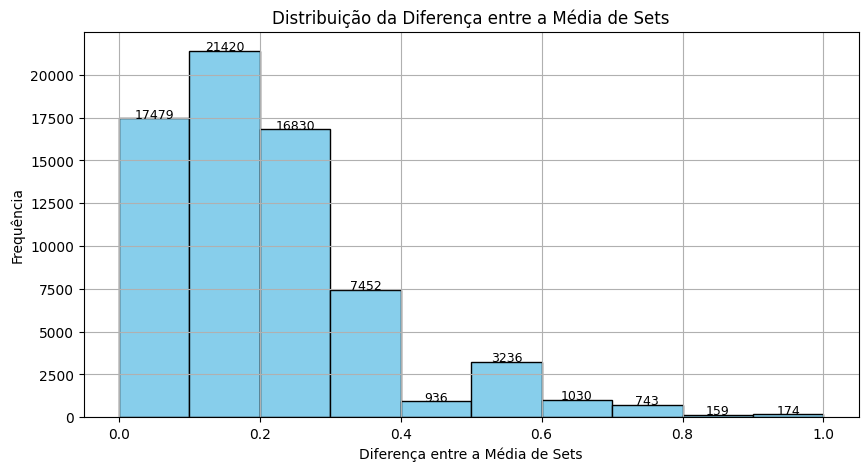

In [ ]:
# Definir bins com espaçamento 0.1
min_val = dados['avg_sets_difference'].min()
max_val = dados['avg_sets_difference'].max()
bins = np.arange(min_val, max_val + 0.1, 0.1)

# Criar histograma com matplotlib
plt.figure(figsize=(10, 5))
counts, bins, patches = plt.hist(dados['avg_sets_difference'], bins=bins, color='skyblue', edgecolor='black')

# Adicionar valores em cima das barras
for count, bin_left in zip(counts, bins[:-1]):
    if count > 0:
        plt.text(bin_left + 0.05, count + 0.2, str(int(count)), ha='center', fontsize=9)

plt.xlabel('Diferença entre a Média de Sets')
plt.ylabel('Frequência')
plt.title('Distribuição da Diferença entre a Média de Sets')
plt.grid(True)
plt.show()


### Diferença de rácios

In [ ]:
# Garantir que as datas estão em formato datetime
dados['tournament_start_date'] = pd.to_datetime(dados['tournament_start_date'], errors='coerce')

# Ordenar os dados pela data e ronda (para refletir a cronologia dos jogos)
ordem_rondas = {
    "Qualifiers": 0,
    "Round of 128": 1,
    "Round of 64": 2,
    "Round of 32": 3,
    "Round of 16": 4,
    "Quarter-Finals": 5,
    "Semi-Finals": 6,
    "Finals": 7,
}
dados['round_order'] = dados['match_round'].map(ordem_rondas)
dados = dados.sort_values(by=['tournament_start_date', 'round_order'])

vitórias = defaultdict(int)
derrotas = defaultdict(int)

# Listas para armazenar os rácios
winner_ratios = []
loser_ratios = []

# Iterar sobre as linhas
for _, row in dados.iterrows():
    w = row['winner_id']
    l = row['loser_id']

    # Rácio do vencedor
    v_w = vitórias[w]
    d_w = derrotas[w]
    total_w = v_w + d_w
    ratio_w = v_w / total_w if total_w > 0 else 0.5  # padrão neutro se não tem histórico
    winner_ratios.append(ratio_w)

    # Rácio do perdedor
    v_l = vitórias[l]
    d_l = derrotas[l]
    total_l = v_l + d_l
    ratio_l = v_l / total_l if total_l > 0 else 0.5
    loser_ratios.append(ratio_l)

    # Atualizar contadores (após registrar os rácios!)
    vitórias[w] += 1
    derrotas[l] += 1

# Adicionar colunas ao DataFrame
dados['winner_ratio'] = winner_ratios
dados['loser_ratio'] = loser_ratios

# Calcular a diferença absoluta dos rácios
dados['ratio_difference'] = abs(dados['winner_ratio'] - dados['loser_ratio'])

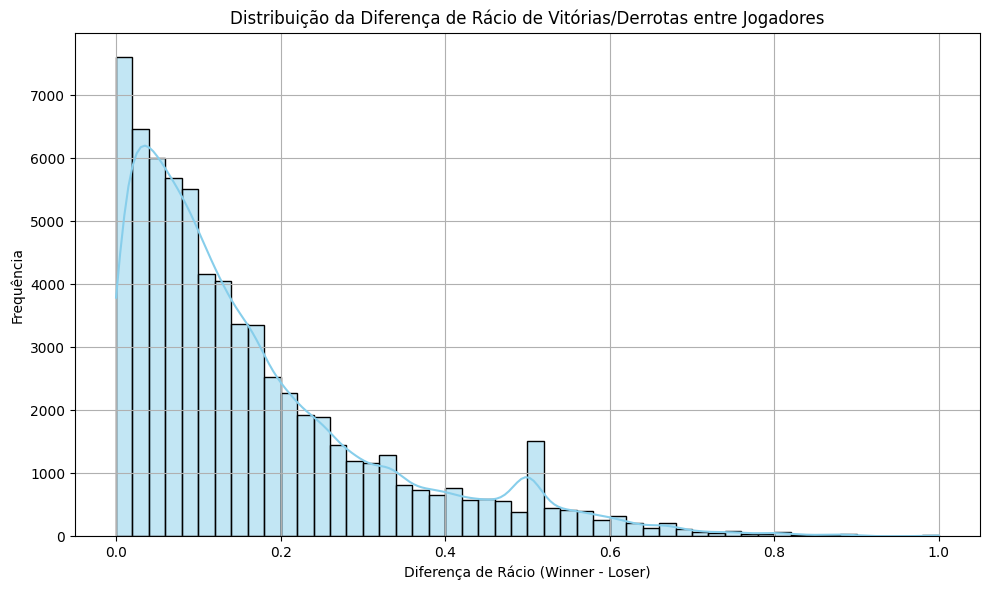

In [ ]:
# Verifica se a variável existe no dataframe
if 'ratio_difference' in dados.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dados, x='ratio_difference', bins=50, kde=True, color='skyblue')

    plt.title('Distribuição da Diferença de Rácio de Vitórias/Derrotas entre Jogadores')
    plt.xlabel('Diferença de Rácio (Winner - Loser)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("A variável 'win_loss_ratio_diff' não foi encontrada no dataframe.")

## Análise univariada com a variável alvo

### tournament_year vs number_of_sets

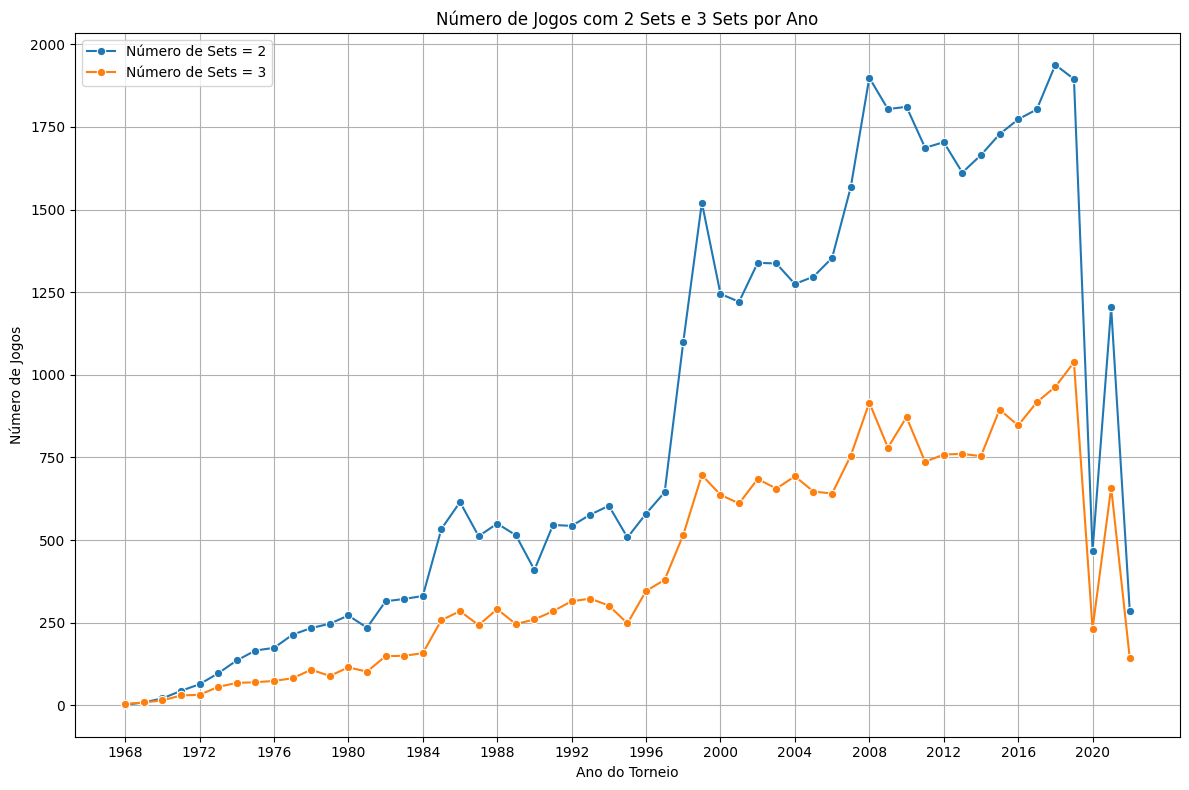

In [ ]:
# Converter para numérico
dados['number_of_sets'] = pd.to_numeric(dados['number_of_sets'], errors='coerce')

# Filtrar os dados para jogos com 2 e 3 sets
sets_2 = dados[dados['number_of_sets'] == 2]
sets_3 = dados[dados['number_of_sets'] == 3]

# Contar o número de jogos com 2 sets e 3 sets por ano
sets_2_per_year = sets_2['tournament_year'].value_counts().sort_index()
sets_3_per_year = sets_3['tournament_year'].value_counts().sort_index()

# Plotar os resultados
plt.figure(figsize=(12, 8))
sns.lineplot(x=sets_2_per_year.index, y=sets_2_per_year.values, label='Número de Sets = 2', marker='o')
sns.lineplot(x=sets_3_per_year.index, y=sets_3_per_year.values, label='Número de Sets = 3', marker='o')

plt.title('Número de Jogos com 2 Sets e 3 Sets por Ano')
plt.xlabel('Ano do Torneio')
plt.ylabel('Número de Jogos')

# Ajustar os ticks do eixo x para ter intervalos de 4 anos
plt.xticks(range(min(sets_2_per_year.index), max(sets_2_per_year.index)+1, 4))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-250-85f20308489c>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



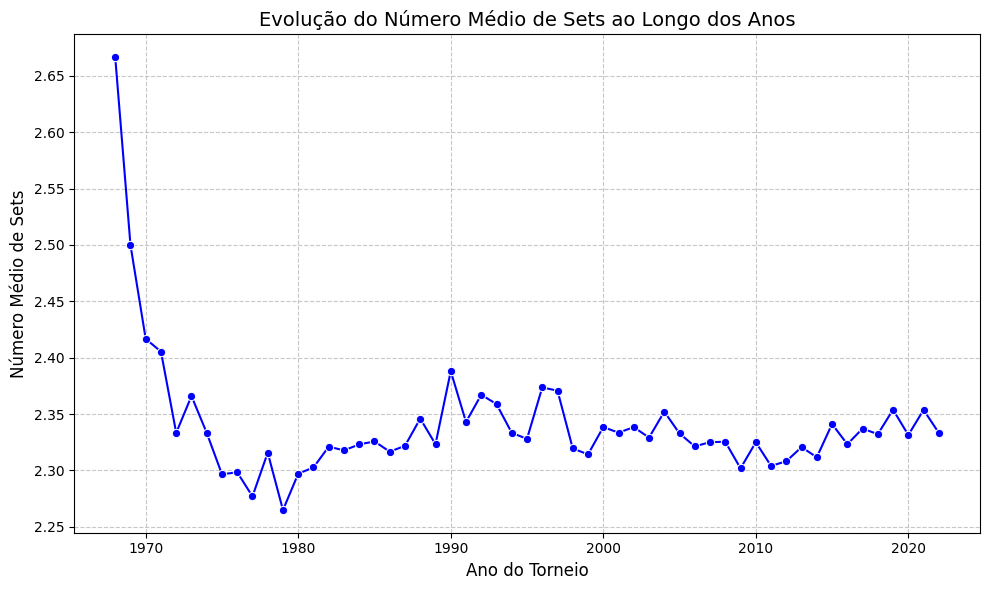

In [ ]:
# Agrupar os dados por ano do torneio e calcular a média do número de sets
evolucao_sets = dados.groupby('tournament_year')['number_of_sets'].mean()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=evolucao_sets.index, y=evolucao_sets.values, marker='o', color='b')

# Ajustes no gráfico
plt.title('Evolução do Número Médio de Sets ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano do Torneio', fontsize=12)
plt.ylabel('Número Médio de Sets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### height_difference vs. number_of_sets

<ipython-input-251-5fdcc815d214>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




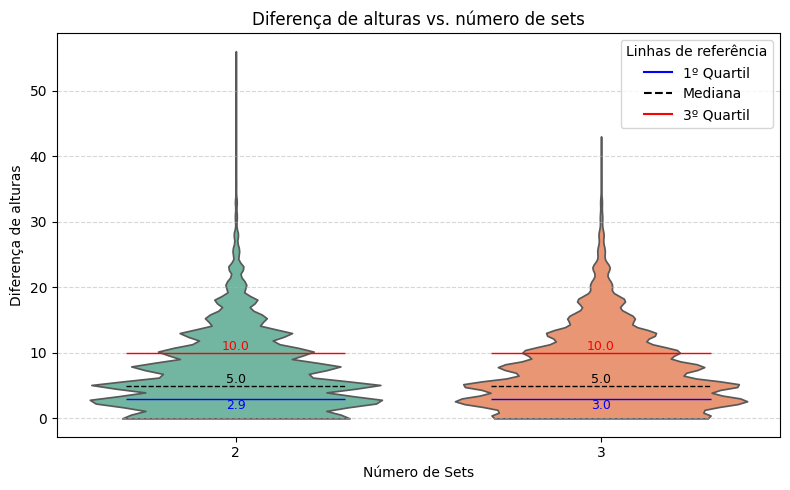

In [ ]:
# Garantir que number_of_sets é string
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

plt.figure(figsize=(8, 5))

# Gráfico violino sem linhas internas (vamos desenhá-las manualmente)
sns.violinplot(x='number_of_sets', y='height_difference', data=dados,
               order=['2', '3'], palette='Set2', inner=None, cut=0)

# Calcular os quartis por grupo
quartis = dados.groupby('number_of_sets')['height_difference'].quantile([0.25, 0.5, 0.75]).unstack()

# Adicionar linhas coloridas e valores
for i, num_sets in enumerate(['2', '3']):
    q1 = quartis.loc[num_sets, 0.25]
    med = quartis.loc[num_sets, 0.5]
    q3 = quartis.loc[num_sets, 0.75]

    # Linhas horizontais: Q1 em azul, mediana tracejada em preto, Q3 em vermelho
    plt.hlines(q1, i - 0.3, i + 0.3, colors='blue', linestyles='-', linewidth=1)
    plt.hlines(med, i - 0.3, i + 0.3, colors='black', linestyles='--', linewidth=1)
    plt.hlines(q3, i - 0.3, i + 0.3, colors='red', linestyles='-', linewidth=1)

    # Anotações dos valores
    plt.text(i, q1, f'{q1:.1f}', color='blue', ha='center', va='top', fontsize=9)
    plt.text(i, med, f'{med:.1f}', color='black', ha='center', va='bottom', fontsize=9)
    plt.text(i, q3, f'{q3:.1f}', color='red', ha='center', va='bottom', fontsize=9)

# Legenda
import matplotlib.lines as mlines
q1_line = mlines.Line2D([], [], color='blue', linestyle='-', label='1º Quartil')
med_line = mlines.Line2D([], [], color='black', linestyle='--', label='Mediana')
q3_line = mlines.Line2D([], [], color='red', linestyle='-', label='3º Quartil')
plt.legend(handles=[q1_line, med_line, q3_line], loc='upper right', title='Linhas de referência')

# Títulos e eixos
plt.title('Diferença de alturas vs. número de sets')
plt.xlabel('Número de Sets')
plt.ylabel('Diferença de alturas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-252-e73dc2de1c67>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




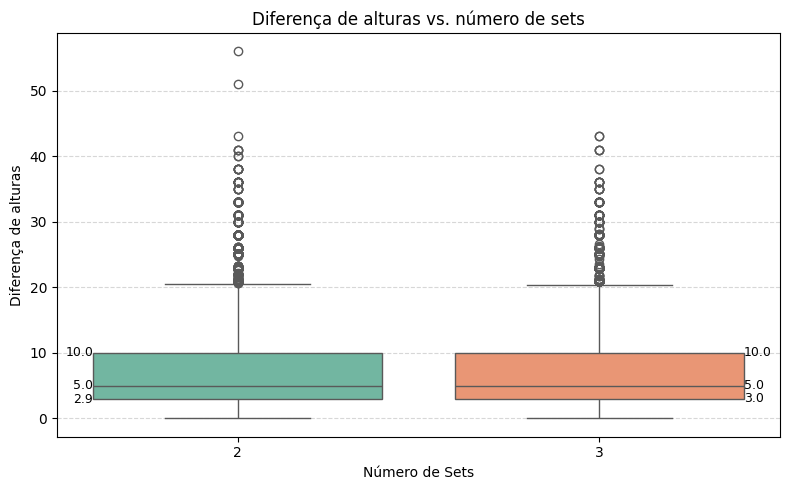

In [ ]:
# Garantir que number_of_sets é string
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

plt.figure(figsize=(8, 5))

# Boxplot
sns.boxplot(x='number_of_sets', y='height_difference', data=dados,
            order=['2', '3'], palette='Set2')

# Calcular os quartis por grupo
quartis = dados.groupby('number_of_sets')['height_difference'].quantile([0.25, 0.5, 0.75]).unstack()

# Adicionar os valores ao lado dos boxplots
for i, num_sets in enumerate(['2', '3']):
    q1 = quartis.loc[num_sets, 0.25]
    med = quartis.loc[num_sets, 0.5]
    q3 = quartis.loc[num_sets, 0.75]

    # Definir posição horizontal (ao lado do box)
    deslocamento_x = 0.4
    if num_sets == '2':
        x_pos = i - deslocamento_x
        ha = 'right'
    else:  # num_sets == '3'
        x_pos = i + deslocamento_x
        ha = 'left'

    # Anotações ao lado do box
    plt.text(x_pos, q1, f'{q1:.1f}', color='black', ha=ha, va='center', fontsize=9)
    plt.text(x_pos, med, f'{med:.1f}', color='black', ha=ha, va='center', fontsize=9)
    plt.text(x_pos, q3, f'{q3:.1f}', color='black', ha=ha, va='center', fontsize=9)

# Títulos e eixos
plt.title('Diferença de alturas vs. número de sets')
plt.xlabel('Número de Sets')
plt.ylabel('Diferença de alturas')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### rank_difference vs. number_of_sets

<ipython-input-253-9f5194088c88>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




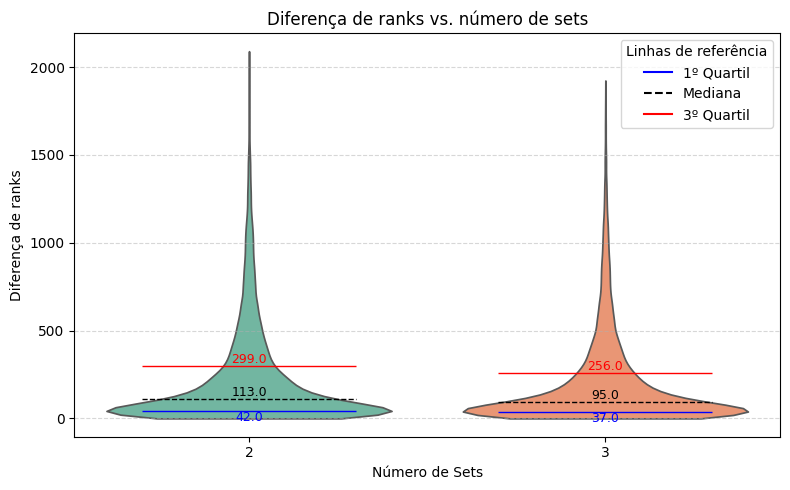

In [ ]:
# Garantir que number_of_sets é string
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

plt.figure(figsize=(8, 5))

# Gráfico violino
sns.violinplot(x='number_of_sets', y='rank_difference', data=dados,
               order=['2', '3'], palette='Set2', inner=None, cut=0)

# Calcular os quartis por grupo
quartis = dados.groupby('number_of_sets')['rank_difference'].quantile([0.25, 0.5, 0.75]).unstack()

# Adicionar linhas coloridas e valores
for i, num_sets in enumerate(['2', '3']):
    q1 = quartis.loc[num_sets, 0.25]
    med = quartis.loc[num_sets, 0.5]
    q3 = quartis.loc[num_sets, 0.75]

    # Linhas horizontais: Q1 em azul, mediana tracejada em preto, Q3 em vermelho
    plt.hlines(q1, i - 0.3, i + 0.3, colors='blue', linestyles='-', linewidth=1)
    plt.hlines(med, i - 0.3, i + 0.3, colors='black', linestyles='--', linewidth=1)
    plt.hlines(q3, i - 0.3, i + 0.3, colors='red', linestyles='-', linewidth=1)

    # Anotações dos valores
    plt.text(i, q1, f'{q1:.1f}', color='blue', ha='center', va='top', fontsize=9)
    plt.text(i, med, f'{med:.1f}', color='black', ha='center', va='bottom', fontsize=9)
    plt.text(i, q3, f'{q3:.1f}', color='red', ha='center', va='bottom', fontsize=9)

# Legenda
import matplotlib.lines as mlines
q1_line = mlines.Line2D([], [], color='blue', linestyle='-', label='1º Quartil')
med_line = mlines.Line2D([], [], color='black', linestyle='--', label='Mediana')
q3_line = mlines.Line2D([], [], color='red', linestyle='-', label='3º Quartil')
plt.legend(handles=[q1_line, med_line, q3_line], loc='upper right', title='Linhas de referência')

# Títulos e eixos
plt.title('Diferença de ranks vs. número de sets')
plt.xlabel('Número de Sets')
plt.ylabel('Diferença de ranks')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### avg_sets_difference vs number_of_sets

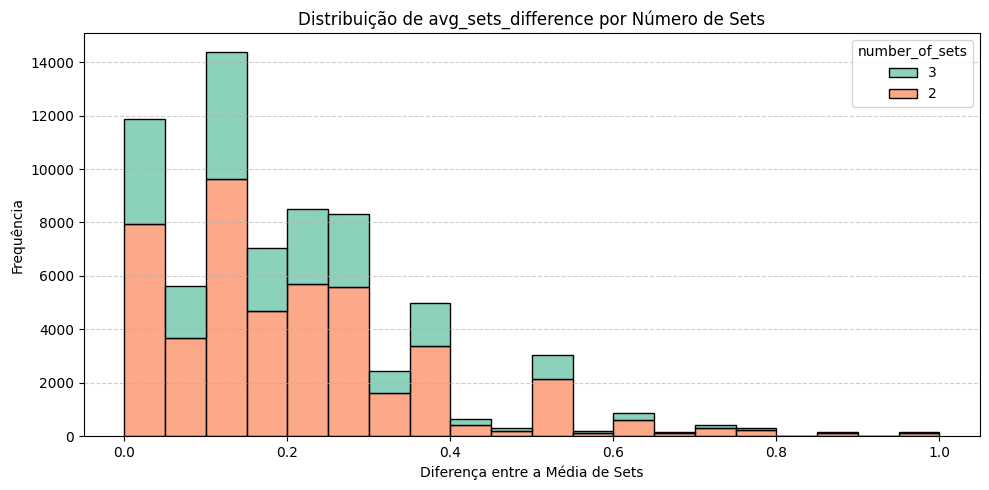

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=dados, x='avg_sets_difference', hue='number_of_sets',
             bins=20, kde=False, palette='Set2', edgecolor='black', multiple='stack')

plt.xlabel('Diferença entre a Média de Sets')
plt.ylabel('Frequência')
plt.title('Distribuição de avg_sets_difference por Número de Sets')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### age_difference vs. number_of_sets

<ipython-input-255-1500c80734a2>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




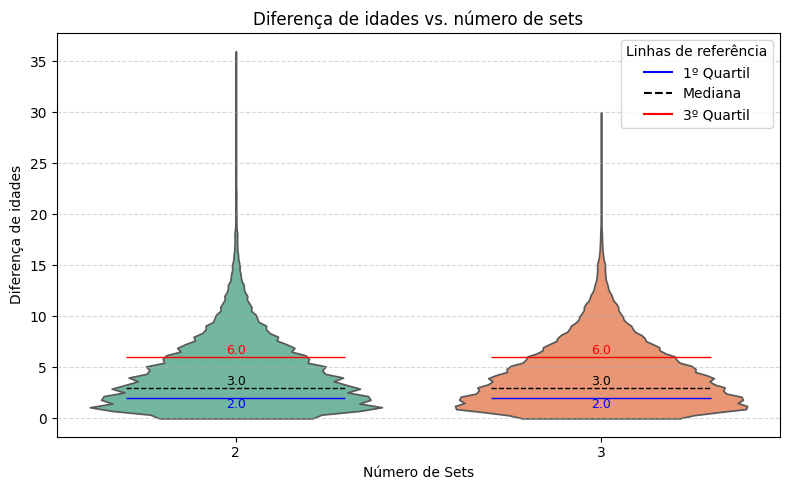

In [ ]:
# Garantir que number_of_sets é string
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

plt.figure(figsize=(8, 5))

# Gráfico violino
sns.violinplot(x='number_of_sets', y='age_difference', data=dados,
               order=['2', '3'], palette='Set2', inner=None, cut=0)

# Calcular os quartis por grupo
quartis = dados.groupby('number_of_sets')['age_difference'].quantile([0.25, 0.5, 0.75]).unstack()

# Adicionar linhas coloridas e valores
for i, num_sets in enumerate(['2', '3']):
    q1 = quartis.loc[num_sets, 0.25]
    med = quartis.loc[num_sets, 0.5]
    q3 = quartis.loc[num_sets, 0.75]

    # Linhas horizontais: Q1 em azul, mediana tracejada em preto, Q3 em vermelho
    plt.hlines(q1, i - 0.3, i + 0.3, colors='blue', linestyles='-', linewidth=1)
    plt.hlines(med, i - 0.3, i + 0.3, colors='black', linestyles='--', linewidth=1)
    plt.hlines(q3, i - 0.3, i + 0.3, colors='red', linestyles='-', linewidth=1)

    # Anotações dos valores
    plt.text(i, q1, f'{q1:.1f}', color='blue', ha='center', va='top', fontsize=9)
    plt.text(i, med, f'{med:.1f}', color='black', ha='center', va='bottom', fontsize=9)
    plt.text(i, q3, f'{q3:.1f}', color='red', ha='center', va='bottom', fontsize=9)

# Legenda
import matplotlib.lines as mlines
q1_line = mlines.Line2D([], [], color='blue', linestyle='-', label='1º Quartil')
med_line = mlines.Line2D([], [], color='black', linestyle='--', label='Mediana')
q3_line = mlines.Line2D([], [], color='red', linestyle='-', label='3º Quartil')
plt.legend(handles=[q1_line, med_line, q3_line], loc='upper right', title='Linhas de referência')

# Títulos e eixos
plt.title('Diferença de idades vs. número de sets')
plt.xlabel('Número de Sets')
plt.ylabel('Diferença de idades')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### total_matches_difference vs. number_of_sets

<ipython-input-256-849193a48084>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




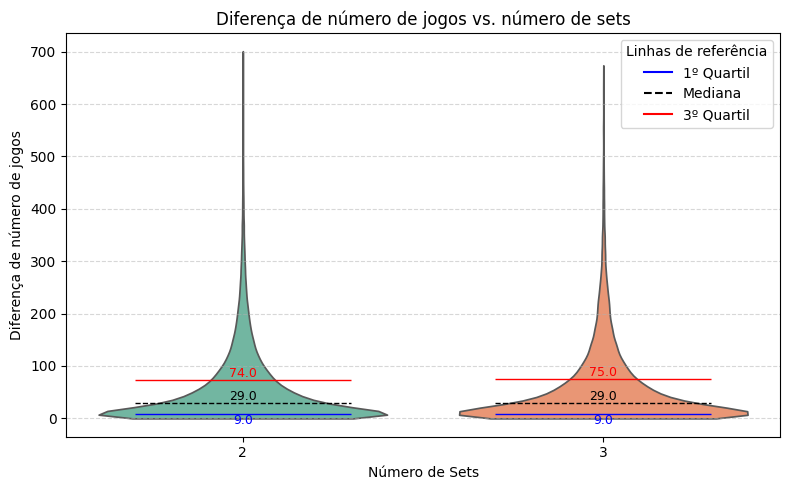

In [ ]:
# Garantir que number_of_sets é string
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

plt.figure(figsize=(8, 5))

# Gráfico violino
sns.violinplot(x='number_of_sets', y='total_matches_difference', data=dados,
               order=['2', '3'], palette='Set2', inner=None, cut=0)

# Calcular os quartis por grupo
quartis = dados.groupby('number_of_sets')['total_matches_difference'].quantile([0.25, 0.5, 0.75]).unstack()

# Adicionar linhas coloridas e valores
for i, num_sets in enumerate(['2', '3']):
    q1 = quartis.loc[num_sets, 0.25]
    med = quartis.loc[num_sets, 0.5]
    q3 = quartis.loc[num_sets, 0.75]

    # Linhas horizontais: Q1 em azul, mediana tracejada em preto, Q3 em vermelho
    plt.hlines(q1, i - 0.3, i + 0.3, colors='blue', linestyles='-', linewidth=1)
    plt.hlines(med, i - 0.3, i + 0.3, colors='black', linestyles='--', linewidth=1)
    plt.hlines(q3, i - 0.3, i + 0.3, colors='red', linestyles='-', linewidth=1)

    # Anotações dos valores
    plt.text(i, q1, f'{q1:.1f}', color='blue', ha='center', va='top', fontsize=9)
    plt.text(i, med, f'{med:.1f}', color='black', ha='center', va='bottom', fontsize=9)
    plt.text(i, q3, f'{q3:.1f}', color='red', ha='center', va='bottom', fontsize=9)

# Legenda
import matplotlib.lines as mlines
q1_line = mlines.Line2D([], [], color='blue', linestyle='-', label='1º Quartil')
med_line = mlines.Line2D([], [], color='black', linestyle='--', label='Mediana')
q3_line = mlines.Line2D([], [], color='red', linestyle='-', label='3º Quartil')
plt.legend(handles=[q1_line, med_line, q3_line], loc='upper right', title='Linhas de referência')

# Títulos e eixos
plt.title('Diferença de número de jogos vs. número de sets')
plt.xlabel('Número de Sets')
plt.ylabel('Diferença de número de jogos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### ratio_difference vs. number_of_sets

<ipython-input-257-9574ebd61bb0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




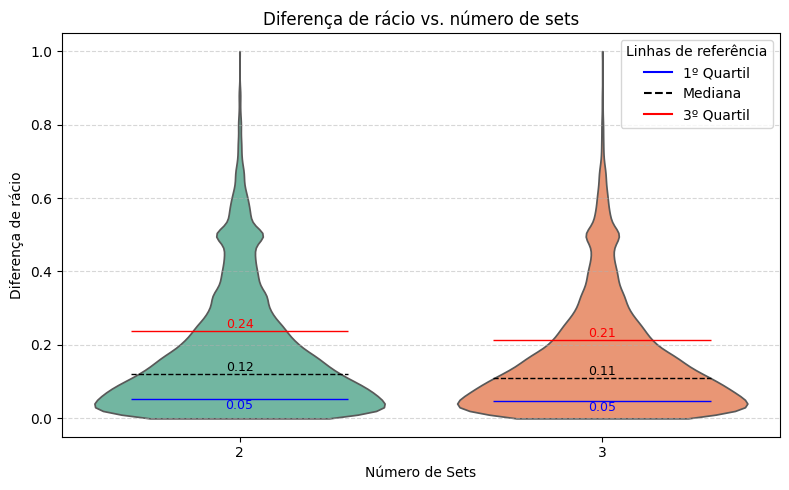

In [ ]:
# Garantir que number_of_sets é string
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

plt.figure(figsize=(8, 5))

# Gráfico violino
sns.violinplot(x='number_of_sets', y='ratio_difference', data=dados,
               order=['2', '3'], palette='Set2', inner=None, cut=0)

# Calcular os quartis por grupo
quartis = dados.groupby('number_of_sets')['ratio_difference'].quantile([0.25, 0.5, 0.75]).unstack()

# Adicionar linhas coloridas e valores
for i, num_sets in enumerate(['2', '3']):
    q1 = quartis.loc[num_sets, 0.25]
    med = quartis.loc[num_sets, 0.5]
    q3 = quartis.loc[num_sets, 0.75]

    # Linhas horizontais: Q1 em azul, mediana tracejada em preto, Q3 em vermelho
    plt.hlines(q1, i - 0.3, i + 0.3, colors='blue', linestyles='-', linewidth=1)
    plt.hlines(med, i - 0.3, i + 0.3, colors='black', linestyles='--', linewidth=1)
    plt.hlines(q3, i - 0.3, i + 0.3, colors='red', linestyles='-', linewidth=1)

    # Anotações dos valores
    plt.text(i, q1, f'{q1:.2f}', color='blue', ha='center', va='top', fontsize=9)
    plt.text(i, med, f'{med:.2f}', color='black', ha='center', va='bottom', fontsize=9)
    plt.text(i, q3, f'{q3:.2f}', color='red', ha='center', va='bottom', fontsize=9)

# Legenda
import matplotlib.lines as mlines
q1_line = mlines.Line2D([], [], color='blue', linestyle='-', label='1º Quartil')
med_line = mlines.Line2D([], [], color='black', linestyle='--', label='Mediana')
q3_line = mlines.Line2D([], [], color='red', linestyle='-', label='3º Quartil')
plt.legend(handles=[q1_line, med_line, q3_line], loc='upper right', title='Linhas de referência')

# Títulos e eixos
plt.title('Diferença de rácio vs. número de sets')
plt.xlabel('Número de Sets')
plt.ylabel('Diferença de rácio')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### forehand_difference vs. number_of_sets


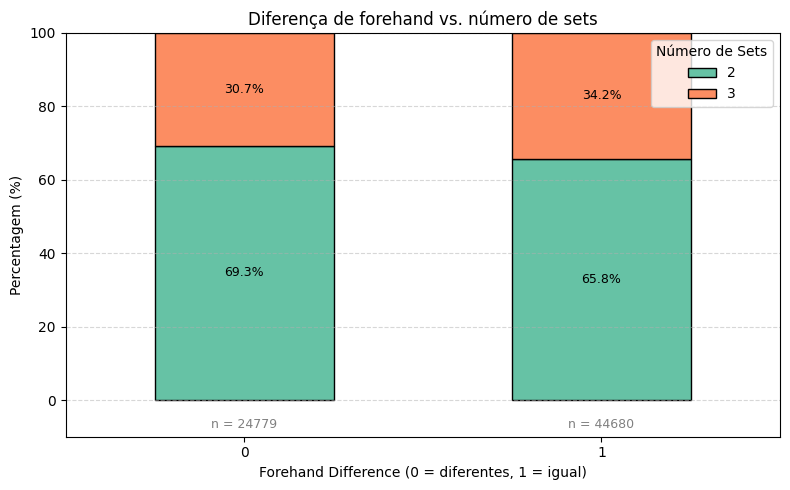

In [ ]:
# Garantir que 'number_of_sets' é string
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

# Calcular proporções
proporcao = (
    dados.groupby('forehand_difference')['number_of_sets']
    .value_counts(normalize=True)
    .rename('percent')
    .reset_index()
)
proporcao['percent'] *= 100  # Converter para percentagem

# Reestruturar os dados para barras empilhadas
tabela_empilhada = proporcao.pivot(index='forehand_difference', columns='number_of_sets', values='percent').fillna(0)

# Ordenar as colunas para garantir a ordem '2', '3'
tabela_empilhada = tabela_empilhada[['2', '3']]

cores = sns.color_palette("Set2")[0:2]
ax = tabela_empilhada.plot(kind='bar', stacked=True, color=cores, figsize=(8, 5), edgecolor='black')

# Adicionar valores dentro das barras
for idx, row in tabela_empilhada.iterrows():
    y_offset = 0
    for i, valor in enumerate(row):
        if valor > 0:
            ax.text(idx, y_offset + valor / 2, f'{valor:.1f}%', ha='center', va='center', fontsize=9, color='black')
            y_offset += valor

# Frequência absoluta de cada categoria de forehand_difference
frequencias = dados['forehand_difference'].value_counts().sort_index()
for idx, freq in enumerate(frequencias):
    ax.text(idx, -5, f'n = {freq}', ha='center', va='top', fontsize=9, color='gray')

# Rótulos e título
plt.xlabel('Forehand Difference (0 = diferentes, 1 = igual)')
plt.ylabel('Percentagem (%)')
plt.title('Diferença de forehand vs. número de sets')
plt.ylim(-10, 100)  # espaço para o texto abaixo do eixo
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.legend(title='Número de Sets', loc='upper right')
plt.tight_layout()
plt.show()


### home_game vs. number_of_sets

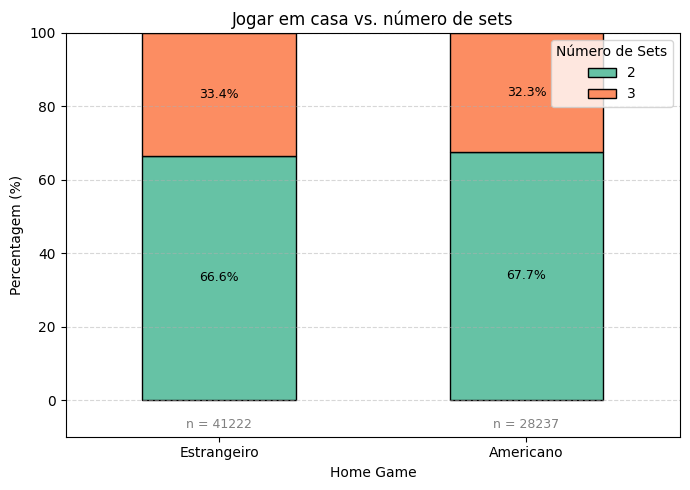

In [ ]:
# Garantir que 'number_of_sets' é string (categórica)
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

# Calcular proporções dentro de cada home_game
proporcao = (
    dados.groupby('home_game')['number_of_sets']
    .value_counts(normalize=True)
    .rename('percent')
    .reset_index()
)
proporcao['percent'] *= 100

# Reestruturar os dados para formato empilhado
tabela_empilhada = proporcao.pivot(index='home_game', columns='number_of_sets', values='percent').fillna(0)
tabela_empilhada = tabela_empilhada[['2', '3']]

cores = sns.color_palette("Set2")[0:2]

# Gráfico de barras empilhadas
ax = tabela_empilhada.plot(kind='bar', stacked=True, color=cores, figsize=(7, 5), edgecolor='black')

# Adicionar percentagens dentro das barras
for idx, row in tabela_empilhada.iterrows():
    y_offset = 0
    for valor in row:
        if valor > 0:
            ax.text(idx, y_offset + valor / 2, f'{valor:.1f}%', ha='center', va='center', fontsize=9)
            y_offset += valor

# Frequência absoluta de jogos por home_game
frequencias = dados['home_game'].value_counts().sort_index()
for idx, freq in enumerate(frequencias):
    ax.text(idx, -5, f'n = {freq}', ha='center', va='top', fontsize=9, color='gray')

# Personalização
plt.title('Jogar em casa vs. número de sets')
plt.xlabel('Home Game')
plt.ylabel('Percentagem (%)')
plt.xticks([0, 1], ['Estrangeiro', 'Americano'])
plt.xticks(rotation=0)
plt.ylim(-10, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Número de Sets', loc='upper right')
plt.tight_layout()
plt.show()

### match_round vs number_of_sets

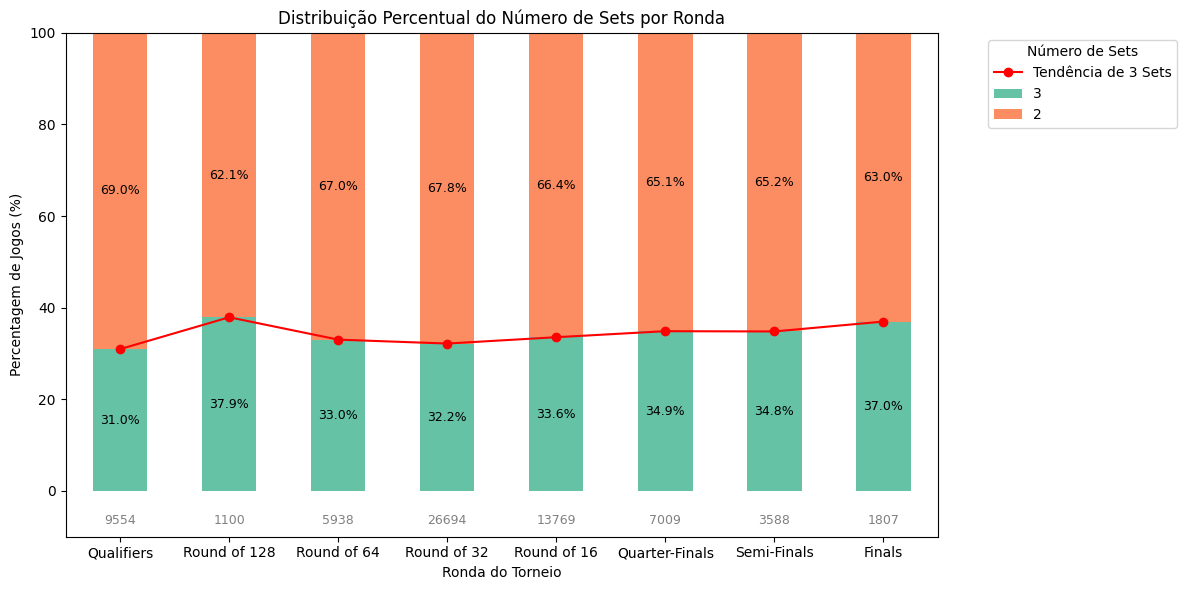

In [ ]:
# Garantir que 'number_of_sets' é string
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

# Definir a ordem das rondas
ordem_rondas = [
    "Qualifiers",
    "Round of 128",
    "Round of 64",
    "Round of 32",
    "Round of 16",
    "Quarter-Finals",
    "Semi-Finals",
    "Finals",
]

# Calcular percentagens
df_percent = (
    dados.groupby(['match_round', 'number_of_sets'])
    .size()
    .reset_index(name='count')
    .pivot(index='match_round', columns='number_of_sets', values='count')
    .fillna(0)
)

# Calcular percentagem
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0) * 100
df_percent = df_percent.reindex(ordem_rondas)

# Inverter colunas: '3' antes de '2'
df_percent = df_percent[['3', '2']]

# Usar paleta Set2
set2_palette = sns.color_palette('Set2', n_colors=2)

# Criar gráfico de barras empilhadas
ax = df_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=set2_palette
)

# Adicionar rótulos (percentagens) em cada segmento da barra
for idx, (i, row) in enumerate(df_percent.iterrows()):
    bottom = 0
    for col, color in zip(df_percent.columns, set2_palette):
        height = row[col]
        if height > 0:
            ax.text(
                idx,
                bottom + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
            bottom += height

# Adicionar curva de tendência para "3 sets"
percentual_3_sets = df_percent['3'].values
x = np.arange(len(df_percent))
ax.plot(x, percentual_3_sets, color='red', marker='o', label='Tendência de 3 Sets')


# Frequência (número de jogos) por match_round
frequencias = (
    dados['match_round']
    .value_counts()
    .reindex(df_percent.index)
    .fillna(0)
    .astype(int)
)

# Adicionar a frequência (número de jogos) abaixo de cada barra
for idx, freq in enumerate(frequencias):
    ax.text(idx, -5, f'{freq}', ha='center', va='top', fontsize=9, color='gray')


# Ajustes finais
ax.set_title('Distribuição Percentual do Número de Sets por Ronda')
ax.set_xlabel('Ronda do Torneio')
ax.set_ylabel('Percentagem de Jogos (%)')
plt.ylim(-10, 100)
ax.set_xticks(x)
ax.set_xticklabels(df_percent.index, rotation=0)
ax.legend(title='Número de Sets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### tournament_prize vs. number_of_sets


<ipython-input-261-7624d8053bdf>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



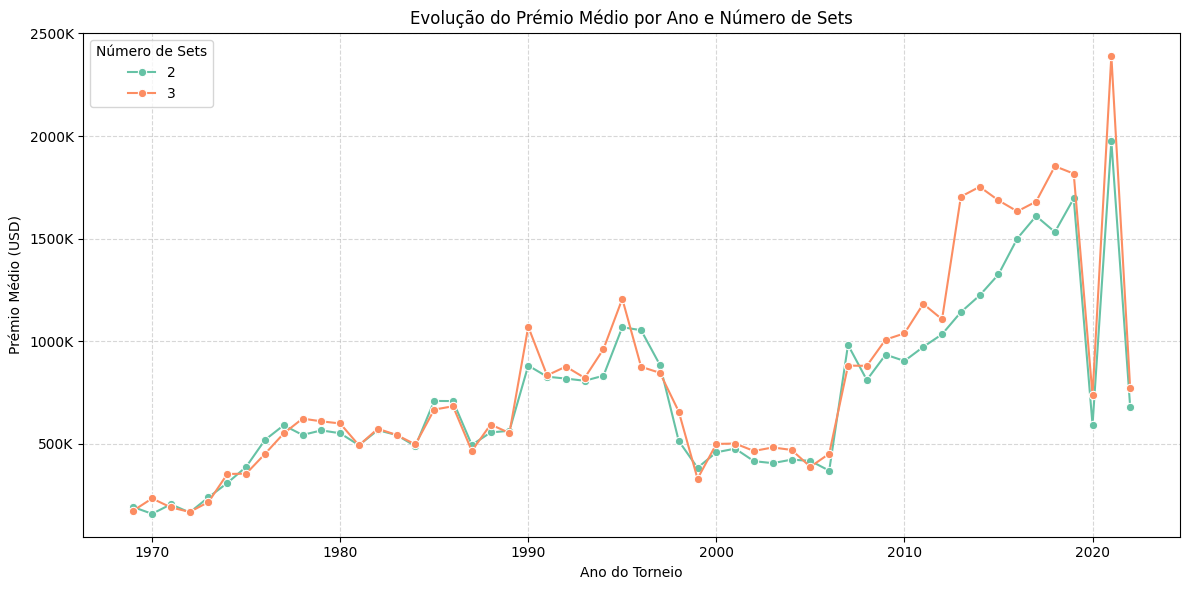

In [ ]:
# Garantir tipos corretos
dados['number_of_sets'] = dados['number_of_sets'].astype(str)

# Calcular média do prémio por ano e número de sets
df_sets_ano = (
    dados.groupby(['tournament_year', 'number_of_sets'])['tournament_prize']
    .mean()
    .reset_index()
)

# Função para formatar eixo y em milhares com "K"
def thousands_formatter(x, pos):
    return f'{int(x/1000)}K'

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_sets_ano,
    x='tournament_year',
    y='tournament_prize',
    hue='number_of_sets',
    palette='Set2',
    marker='o'
)

# Aplicar o formatter ao eixo y
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Personalização
plt.title('Evolução do Prémio Médio por Ano e Número de Sets')
plt.xlabel('Ano do Torneio')
plt.ylabel('Prémio Médio (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Número de Sets')
plt.tight_layout()
plt.show()

# Modelação

## Eliminar todos os NA's


In [ ]:
# Verificar o número de linhas antes da remoção
linhas_antes = dados.shape[0]

# Remover linhas com valores ausentes
dados = dados.dropna()

# Verificar o número de linhas após a remoção
linhas_depois = dados.shape[0]

# Calcular e mostrar quantas linhas foram eliminadas
print(f"Número de registos eliminados devido a NA's: {linhas_antes - linhas_depois}")


Número de registos eliminados devido a NA's: 93


### Tranformação do tipo de variáveis

In [ ]:
dados.dtypes


,0
winner_id,object
winner_name,object
winner_height,float64
winner_country,object
winner_forehand,object
winner_birth_date,datetime64[ns]
loser_id,object
loser_name,object
loser_height,float64
loser_country,object


In [ ]:
dados['number_of_sets'] = dados['number_of_sets'].astype('category')

dados['forehand_difference'] = dados['forehand_difference'].astype('category')

dados['match_round'] = dados['match_round'].astype('category')

dados['home_game'] = dados['home_game'].astype('category')


## Correlações e associações

### Associação entre as variáveis numéricas e variável alvo - Eta

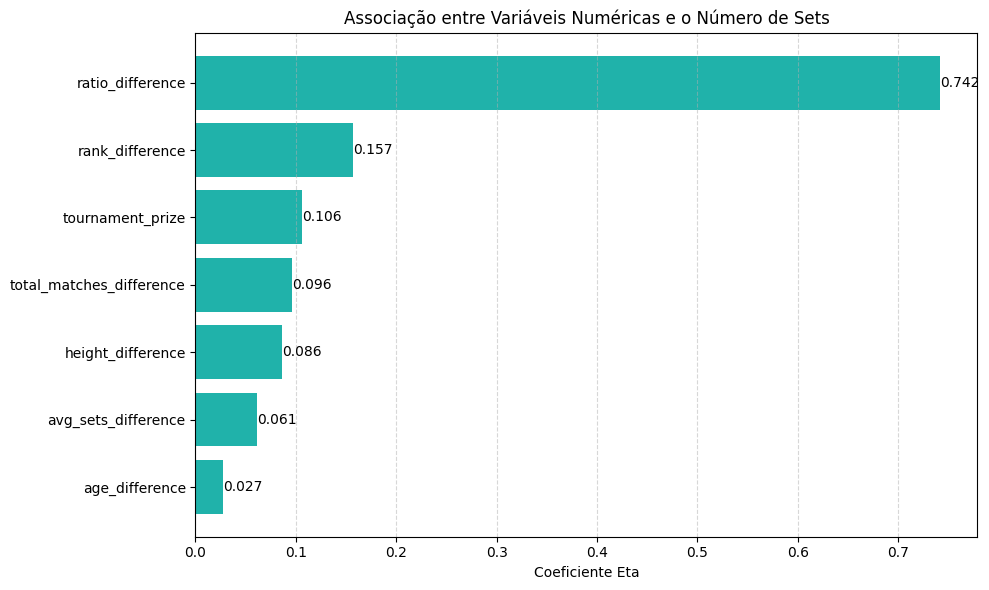

In [ ]:
# Lista de variáveis numéricas a testar
variaveis_numericas = [
    'tournament_prize', 'rank_difference', 'age_difference',
    'height_difference', 'total_matches_difference',
    'avg_sets_difference', 'ratio_difference'
]

# Garante que todas as variáveis numéricas sejam numéricas
for col in variaveis_numericas:
    dados[col] = pd.to_numeric(dados[col], errors='coerce')

def eta_coefficient(y, x):
    y = pd.Series(y)
    x = pd.Series(x)
    mask = (~y.isna()) & (~x.isna())

    y = y[mask].astype(float).to_numpy()
    x = x[mask].to_numpy()

    categories, counts = np.unique(x, return_counts=True)
    l = len(categories)
    m = np.zeros(l)

    for k in range(l):
        y_vals = y[x == categories[k]]
        if len(y_vals) == 0:
            return np.nan
        m[k] = np.mean(y_vals)

    numerator = np.sum(counts * (m - np.mean(y)) ** 2)
    denominator = np.sum((y - np.mean(y)) ** 2)

    if denominator == 0:
        return np.nan

    return np.sqrt(numerator / denominator)

# Calcular os coeficientes Eta
eta_resultados = {}

for var in variaveis_numericas:
    eta_resultados[var] = eta_coefficient(dados['number_of_sets'], dados[var])

# Gráfico
eta_series = pd.Series(eta_resultados).sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(eta_series.index, eta_series.values, color='#20B2AA')

for bar in bars:
    plt.text(bar.get_width() + 0.0001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.3f}', va='center')

plt.xlabel('Coeficiente Eta')
plt.title('Associação entre Variáveis Numéricas e o Número de Sets')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


### Matriz de associação entre as variáveis categóricas e variável alvo - Cramer´s V

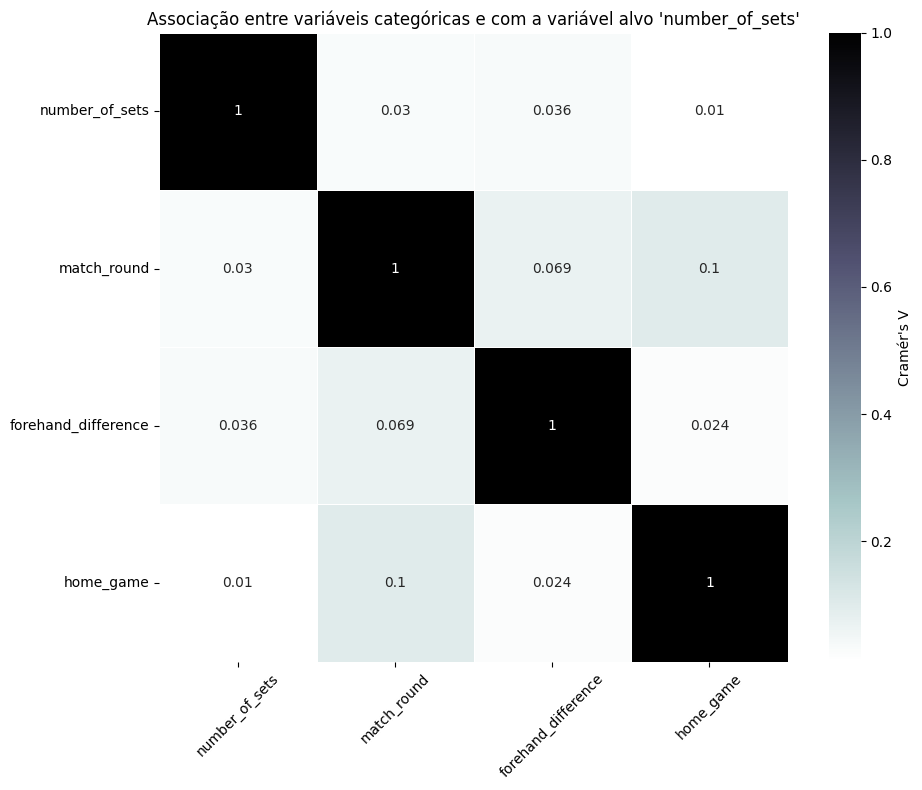

In [ ]:
# Variável alvo + outras variáveis categóricas

variaveis_categoricas = [ 'number_of_sets', 'match_round','forehand_difference', 'home_game']


# Função para calcular Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Criar matriz de correlação
corr_matrix = pd.DataFrame(index=variaveis_categoricas, columns=variaveis_categoricas)

for col1 in variaveis_categoricas:
    for col2 in variaveis_categoricas:
        corr_matrix.loc[col1, col2] = cramers_v(dados[col1], dados[col2])

# Converter para float
corr_matrix = corr_matrix.astype(float)

# Heatmap estilizado
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='bone_r', square=True,
            linewidths=0.5, cbar_kws={"label": "Cramér's V"})
plt.title("Associação entre variáveis categóricas e com a variável alvo 'number_of_sets'")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




### Matriz de correlação entre variáveis numéricas - Pearson

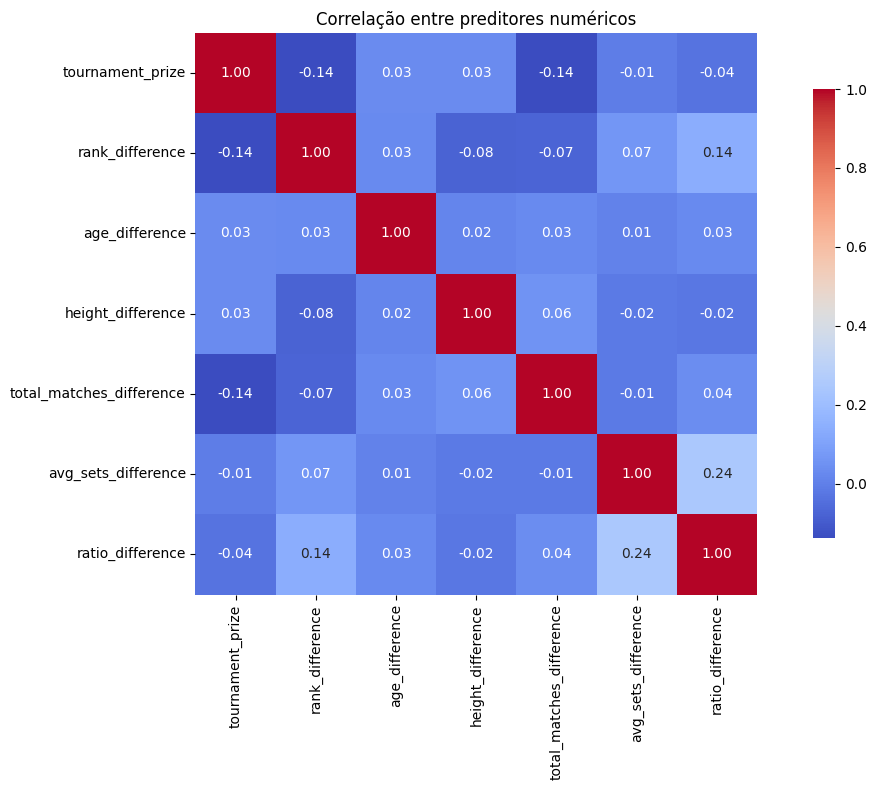

In [ ]:
# Selecionar apenas variáveis numéricas relevantes

variaveis_numericas = [ 'tournament_prize', 'rank_difference', 'age_difference',
    'height_difference', 'total_matches_difference','avg_sets_difference', 'ratio_difference'
]

# Criar a matriz de correlação
correlation_matrix = dados[variaveis_numericas].corr()

# Plotar
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlação entre preditores numéricos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Matriz de associação entre variáveis numéricas e categóricas - Eta

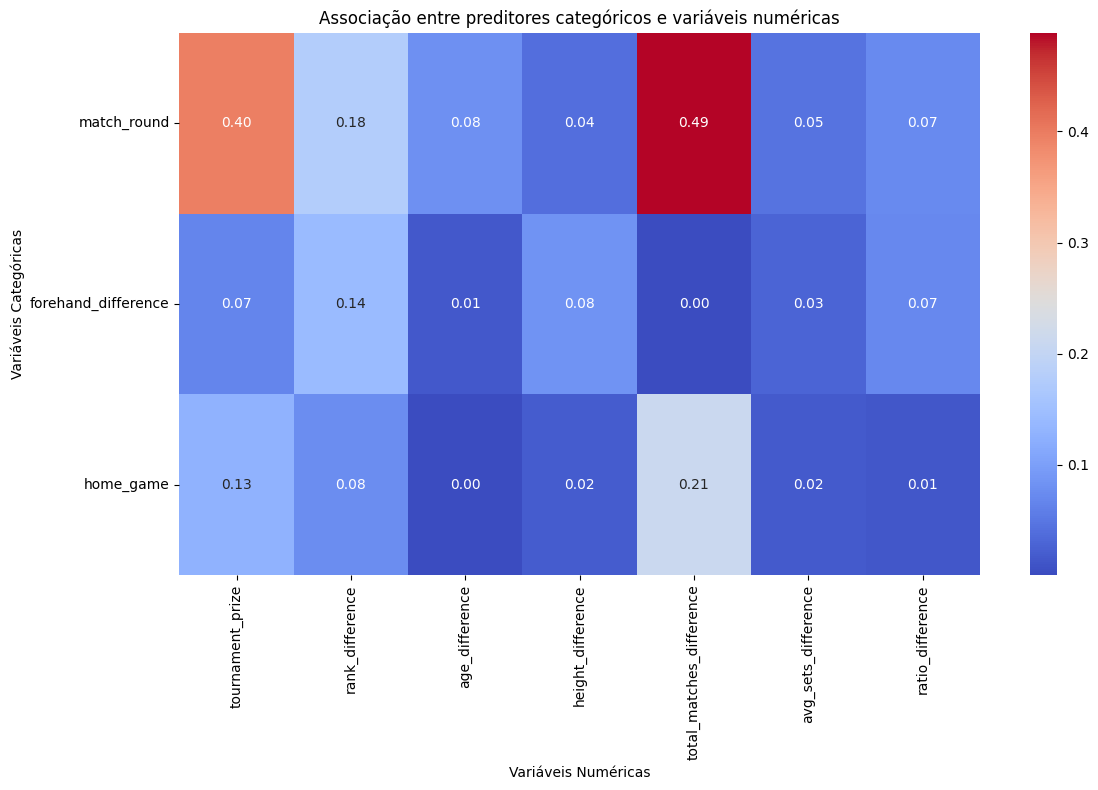

In [ ]:
# y - numérica, x - categórica
def eta_coefficient(y, x):
    y = pd.Series(y)
    x = pd.Series(x)

    # Remover valores ausentes (NaN) de ambas as variáveis
    mask = (~y.isna()) & (~x.isna())
    y = y[mask].to_numpy()
    x = x[mask].to_numpy()

    # Obter categorias únicas e as suas contagens
    categories, counts = np.unique(x, return_counts=True)
    l = len(categories)
    m = np.zeros(l)

    for k in range(l):
        y_vals = y[x == categories[k]]
        if len(y_vals) == 0:
            return np.nan
        m[k] = np.mean(y_vals)

    numerator = np.sum(counts * (m - np.mean(y)) ** 2)
    denominator = np.sum((y - np.mean(y)) ** 2)

    if denominator == 0:
        return np.nan

    return np.sqrt(numerator / denominator)


variaveis_numericas = [ 'tournament_prize', 'rank_difference', 'age_difference',
    'height_difference', 'total_matches_difference','avg_sets_difference','ratio_difference'
]


variaveis_categoricas = ['match_round','forehand_difference', 'home_game']


# Calcular eta entre cada variável numérica e categórica
eta_matrix = pd.DataFrame(index=variaveis_numericas, columns=variaveis_categoricas)

# Calcular coeficientes eta
for num in variaveis_numericas:
    for cat in variaveis_categoricas:
        try:
            eta_val = eta_coefficient(dados[num], dados[cat])
        except:
            eta_val = np.nan
        eta_matrix.loc[num, cat] = eta_val

# Converter para float
eta_matrix = eta_matrix.astype(float)

# Visualização
plt.figure(figsize=(12, 8))
sns.heatmap(eta_matrix.T, annot=True, fmt=".2f", cmap='coolwarm')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Associação entre preditores categóricos e variáveis numéricas')
plt.xlabel('Variáveis Numéricas')
plt.ylabel('Variáveis Categóricas')
plt.tight_layout()
plt.show()

### Amostra treino-teste - Undersampling

In [ ]:
variaveis = ['height_difference', 'tournament_prize','rank_difference', 'age_difference','total_matches_difference','ratio_difference',
             'avg_sets_difference', 'home_game', 'forehand_difference', 'match_round']

dados['number_of_sets'] = dados['number_of_sets'].astype('category')


# Passo 1: Separar por classe
dados_2sets = dados[dados['number_of_sets'].astype(int) == 2]
dados_3sets = dados[dados['number_of_sets'].astype(int) == 3]


# Passo 2: Undersampling
min_count = min(len(dados_2sets), len(dados_3sets))

dados_2sets_amostra = dados_2sets.sample(n=min_count, random_state=42)
dados_3sets_amostra = dados_3sets.sample(n=min_count, random_state=42)

# Passo 3: Juntar e embaralhar
dados_balanceados = pd.concat([dados_2sets_amostra, dados_3sets_amostra]).sample(frac=1, random_state=42)


# Passo 4: Separar X e y
X = dados_balanceados[variaveis]
y = dados_balanceados['number_of_sets']

# Passo 5: Dividir treino/teste (garantir equilíbrio nos dois conjuntos)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Dimensão da amostra de treino (X_train): {X_train.shape}")
print(f"Dimensão da amostra de teste (X_test): {X_test.shape}")


# Verificar proporções
print("Distribuição no treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição no teste:")
print(y_test.value_counts(normalize=True))


# Separar numéricas e categóricas
numericas = ['height_difference', 'tournament_prize','rank_difference', 'age_difference',
                       'total_matches_difference','ratio_difference', 'avg_sets_difference']

categoricas = ['home_game', 'forehand_difference', 'match_round']

#  Pré-processamento
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numericas), # Estandardização das variáveis numéricas
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas) # Transformação das categóricas em variáveis dummy
])


dados['number_of_sets'] = dados['number_of_sets'].astype('category')

Dimensão da amostra de treino (X_train): (36584, 10)
Dimensão da amostra de teste (X_test): (9146, 10)
Distribuição no treino:
number_of_sets
2    0.5
3    0.5
Name: proportion, dtype: float64

Distribuição no teste:
number_of_sets
2    0.5
3    0.5
Name: proportion, dtype: float64


In [ ]:
print("Contagem por número de sets:")
print(dados['number_of_sets'].value_counts())


Contagem por número de sets:
number_of_sets
2    46501
3    22865
Name: count, dtype: int64


## Regressão logística

Matriz de Confusão:
[[2188 2385]
 [1954 2619]]

Relatório de Classificação:
              precision    recall  f1-score   support

           2       0.53      0.48      0.50      4573
           3       0.52      0.57      0.55      4573

    accuracy                           0.53      9146
   macro avg       0.53      0.53      0.52      9146
weighted avg       0.53      0.53      0.52      9146

Acurácia: 0.5256


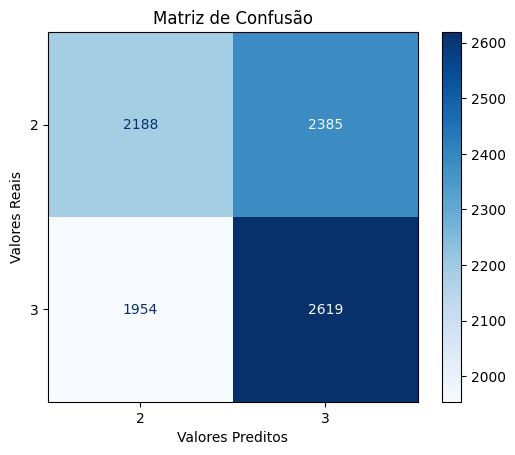

Relatório de Classificação - Validação Cruzada (10 Folds):
              precision    recall  f1-score   support

           2       0.53      0.48      0.50     18292
           3       0.52      0.57      0.55     18292

    accuracy                           0.52     36584
   macro avg       0.53      0.52      0.52     36584
weighted avg       0.53      0.52      0.52     36584

Acurácia (Validação Cruzada 10-folds): 0.5249


In [ ]:
# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Previsão
y_pred = pipeline.predict(X_test)

# Resultados
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")

# Criar o gráfico da matriz de confusão
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.grid(False)
plt.show()


# Cross-validation (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

# Obter previsões com validação cruzada (10 folds)
y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=cv)

# Relatório de Classificação
print("Relatório de Classificação - Validação Cruzada (10 Folds):")
print(classification_report(y_train, y_pred_cv))
print(f"Acurácia (Validação Cruzada 10-folds): {scores.mean():.4f}")

### Curva ROC - Regressão Logística

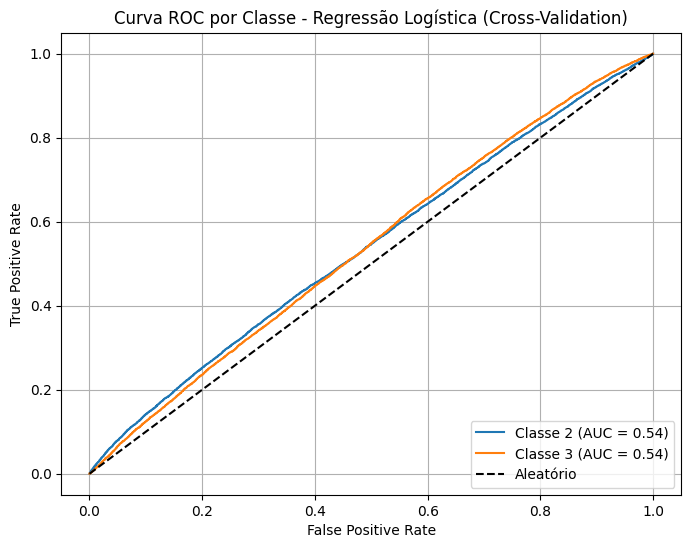

In [ ]:
# Obter probabilidades preditas em CV para cada exemplo do treino
y_prob_cv = cross_val_predict(
    pipeline, X_train, y_train,
    cv=cv,
    method='predict_proba'  # Importante para pegar probabilidades
)

# Classes (ex: ['2', '3'])
classes = pipeline.named_steps['classifier'].classes_

# Dicionários para armazenar resultados
fpr = dict()
tpr = dict()
roc_auc = dict()

# Para cada classe, calcular curva ROC e AUC
for i, class_label in enumerate(classes):
    # Binariza a variável resposta para "one-vs-rest"
    y_true_binary = (y_train == class_label).astype(int)
    y_scores = y_prob_cv[:, i]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_scores)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plotar as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label],
             label=f'Classe {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Classe - Regressão Logística (Cross-Validation)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## KNN

KNN - Avaliação
Matriz de Confusão:
[[2312 2261]
 [2281 2292]]

Relatório de Classificação:
              precision    recall  f1-score   support

           2       0.50      0.51      0.50      4573
           3       0.50      0.50      0.50      4573

    accuracy                           0.50      9146
   macro avg       0.50      0.50      0.50      9146
weighted avg       0.50      0.50      0.50      9146

Acurácia - KNN: 0.5034


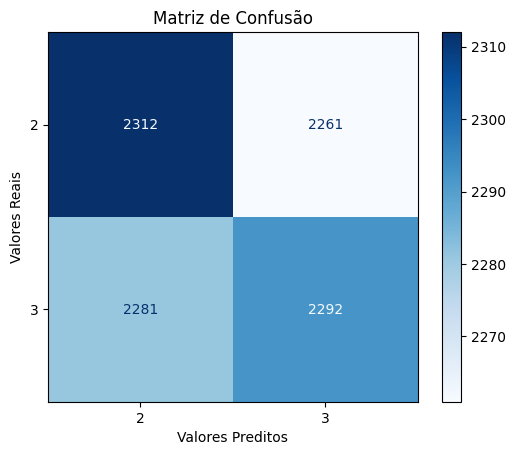

Relatório de Classificação - Validação Cruzada (10 Folds):
              precision    recall  f1-score   support

           2       0.53      0.48      0.50     18292
           3       0.52      0.57      0.55     18292

    accuracy                           0.52     36584
   macro avg       0.53      0.52      0.52     36584
weighted avg       0.53      0.52      0.52     36584

Acurácia (Validação Cruzada 10-folds): 0.5078


In [ ]:
# Pipeline para KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Treinar o modelo
pipeline_knn.fit(X_train, y_train)

# Previsão
y_pred_knn = pipeline_knn.predict(X_test)

# Resultados
print("KNN - Avaliação")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))
print(f"Acurácia - KNN: {accuracy_score(y_test, y_pred_knn):.4f}")

# Criar o gráfico da matriz de confusão
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')

plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.grid(False)
plt.show()


# Cross-validation (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_knn, X_train, y_train, cv=cv, scoring='accuracy')

# Obter previsões com validação cruzada (10 folds)
y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=cv)

# Relatório de Classificação
print("Relatório de Classificação - Validação Cruzada (10 Folds):")
print(classification_report(y_train, y_pred_cv))
print(f"Acurácia (Validação Cruzada 10-folds): {scores.mean():.4f}")

### Curva ROC - KNN

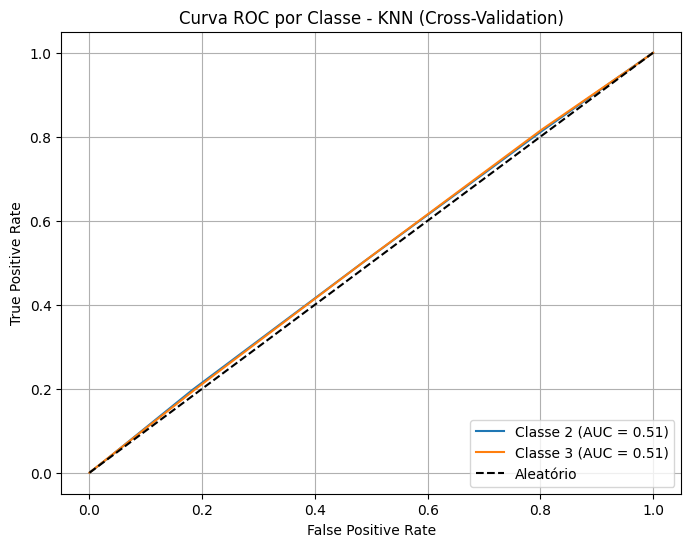

In [ ]:

# Obter probabilidades preditas em CV para cada exemplo do treino
y_prob_cv = cross_val_predict(
    pipeline_knn, X_train, y_train,
    cv=cv,
    method='predict_proba'  # Importante para pegar probabilidades
)

# Classes (ex: ['2', '3'])
classes = pipeline_knn.named_steps['classifier'].classes_

# Dicionários para armazenar resultados
fpr = dict()
tpr = dict()
roc_auc = dict()

# Para cada classe, calcular curva ROC e AUC
for i, class_label in enumerate(classes):
    # Binariza a variável resposta para "one-vs-rest"
    y_true_binary = (y_train == class_label).astype(int)
    y_scores = y_prob_cv[:, i]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_scores)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plotar as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label],
             label=f'Classe {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Classe - KNN (Cross-Validation)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Árvore de decisão

Decision Tree - Avaliação
Matriz de Confusão:
[[1665 2908]
 [1491 3082]]

Relatório de Classificação:
              precision    recall  f1-score   support

           2       0.53      0.36      0.43      4573
           3       0.51      0.67      0.58      4573

    accuracy                           0.52      9146
   macro avg       0.52      0.52      0.51      9146
weighted avg       0.52      0.52      0.51      9146

Acurácia - Decision Tree: 0.5190


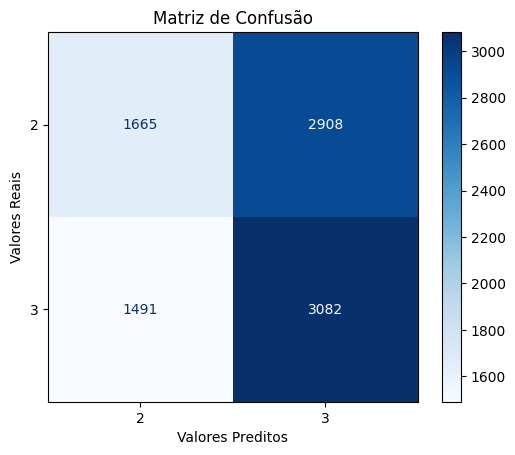

Relatório de Classificação - Validação Cruzada (10 Folds):
              precision    recall  f1-score   support

           2       0.53      0.42      0.47     18292
           3       0.52      0.62      0.57     18292

    accuracy                           0.52     36584
   macro avg       0.52      0.52      0.52     36584
weighted avg       0.52      0.52      0.52     36584

Acurácia (Validação Cruzada 10-folds): 0.5209


In [ ]:
# Pipeline para Árvore de Decisão
pipeline_dt = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))  # max_depth é opcional
])

# Treinar o modelo
pipeline_dt.fit(X_train, y_train)

# Previsão
y_pred_dt = pipeline_dt.predict(X_test)

# Resultados
print("Decision Tree - Avaliação")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))
print(f"Acurácia - Decision Tree: {accuracy_score(y_test, y_pred_dt):.4f}")

# Criar o gráfico da matriz de confusão
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='Blues')

plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.grid(False)
plt.show()



# Cross-validation (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_dt, X_train, y_train, cv=cv, scoring='accuracy')


# Obter previsões com validação cruzada (10 folds)
y_pred_cv = cross_val_predict(pipeline_dt, X_train, y_train, cv=cv)

# Relatório de Classificação
print("Relatório de Classificação - Validação Cruzada (10 Folds):")
print(classification_report(y_train, y_pred_cv))
print(f"Acurácia (Validação Cruzada 10-folds): {scores.mean():.4f}")

### Curva ROC - Árvore de decisão

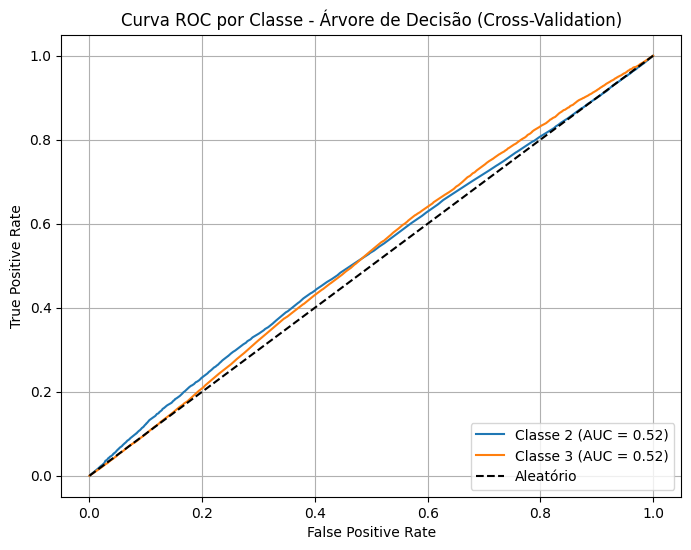

In [ ]:
# Obter probabilidades preditas em CV para cada exemplo do treino
y_prob_cv = cross_val_predict(
    pipeline_dt, X_train, y_train,
    cv=cv,
    method='predict_proba'  # Importante para pegar probabilidades
)

# Classes (ex: ['2', '3'])
classes = pipeline_dt.named_steps['classifier'].classes_

# Dicionários para armazenar resultados
fpr = dict()
tpr = dict()
roc_auc = dict()

# Para cada classe, calcular curva ROC e AUC
for i, class_label in enumerate(classes):
    # Binariza a variável resposta para "one-vs-rest"
    y_true_binary = (y_train == class_label).astype(int)
    y_scores = y_prob_cv[:, i]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_scores)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plotar as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label],
             label=f'Classe {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Classe - Árvore de Decisão (Cross-Validation)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Random Forest

Random Forest - Avaliação
Matriz de Confusão:
[[2103 2470]
 [1855 2718]]

Relatório de Classificação:
              precision    recall  f1-score   support

           2       0.53      0.46      0.49      4573
           3       0.52      0.59      0.56      4573

    accuracy                           0.53      9146
   macro avg       0.53      0.53      0.52      9146
weighted avg       0.53      0.53      0.52      9146

Acurácia - Random Forest: 0.5271


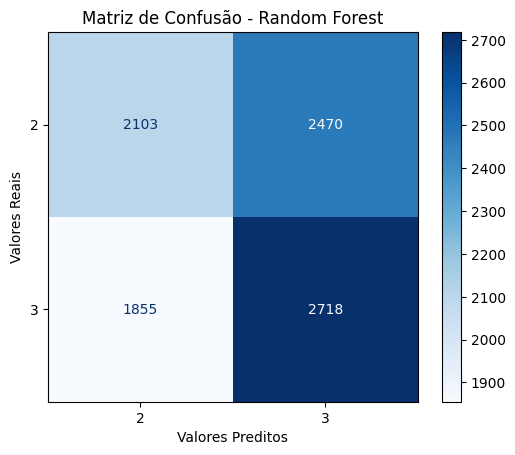

Relatório de Classificação - Validação Cruzada (10 Folds):
              precision    recall  f1-score   support

           2       0.53      0.46      0.49     18292
           3       0.52      0.60      0.56     18292

    accuracy                           0.53     36584
   macro avg       0.53      0.53      0.52     36584
weighted avg       0.53      0.53      0.52     36584

Acurácia (Validação Cruzada 10-folds): 0.5270


In [ ]:
# Pipeline para Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10))  # Ajuste de parâmetros
])

# Treinar o modelo
pipeline_rf.fit(X_train, y_train)

# Previsão
y_pred_rf = pipeline_rf.predict(X_test)

# Resultados
print("Random Forest - Avaliação")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
print(f"Acurácia - Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")

# Criar o gráfico da matriz de confusão
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues')

plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.grid(False)
plt.show()


# Cross-validation (k=10)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring='accuracy')


# Obter previsões com validação cruzada (10 folds)
y_pred_cv = cross_val_predict(pipeline_rf, X_train, y_train, cv=cv)

# Relatório de Classificação
print("Relatório de Classificação - Validação Cruzada (10 Folds):")
print(classification_report(y_train, y_pred_cv))
print(f"Acurácia (Validação Cruzada 10-folds): {scores.mean():.4f}")

### Curva ROC - Random Forest

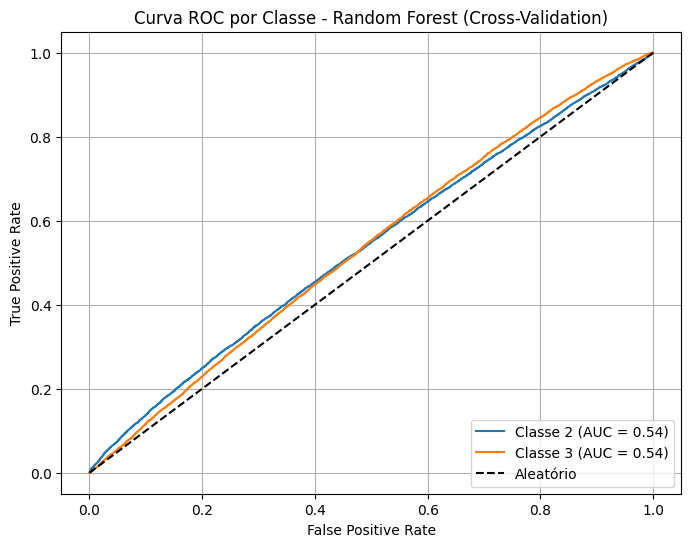

In [ ]:
# Obter probabilidades preditas em CV para cada exemplo do treino
y_prob_cv = cross_val_predict(
    pipeline_rf, X_train, y_train,
    cv=cv,
    method='predict_proba'  # Importante para pegar probabilidades
)

# Classes (ex: ['2', '3'])
classes = pipeline_rf.named_steps['classifier'].classes_

# Dicionários para armazenar resultados
fpr = dict()
tpr = dict()
roc_auc = dict()

# Para cada classe, calcular curva ROC e AUC
for i, class_label in enumerate(classes):
    # Binariza a variável resposta para "one-vs-rest"
    y_true_binary = (y_train == class_label).astype(int)
    y_scores = y_prob_cv[:, i]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_scores)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plotar as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label],
             label=f'Classe {class_label} (AUC = {roc_auc[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Classe - Random Forest (Cross-Validation)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()